# lab-feature-extraction
## Cleaning categorical data 

In [1]:
#Step 1 Import the necessary libraries.
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
#Step 2 Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
#Read the csv file
customer_df=pd.read_csv(r'C:\Users\laura\Desktop\ironhack\MySQL\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
#Rename the columns so they follow the PE8 (snake case).
customer_df.columns = customer_df.columns.str.lower(). str.replace(" ", "_")
customer_df

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor           2/24/11         Employed      F   56274   
1     Bachelor           1/31/11       Unemployed      F       0   
2     Bachelor           2/19/11         Employed      F   48767   
3     Bachelor           1/20/11       Unemployed      M       0   
4     Bachelor            2/3/11         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1 

In [4]:
#Check the dataframe features
print(customer_df.shape)
print(customer_df.info())

(9134, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 n

In [5]:
#Check the dataframe head
customer_df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [6]:
#Check the dataframe tail
customer_df.tail()

customer       state  customer_lifetime_value response  coverage  \
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1  Corporate Auto   

            policy renew_offer_type sales_channel  total_claim_amount  \
9129   Personal L1           Offer2           Web          198.234764   
9130  Corporate L3           Offer1        Branch          379.200000   
9131  Corporate L2           Offer1        Branch          790.784983   
9132   Personal L2           Offer3        Branch          691.200000   
9133  Corporate L3           Offer4   Call Center          369.600000   

      vehicle_class vehicle_size  
9129  Four-Door Car      Medsize  
9130  Four-Door Car      Medsize  
9131  Four-Door Car      Medsize  
9132  Four-Door Car        Large  
9133   Two-Door Car      Medsize

In [7]:
#Standarizing the column name
cols =[]
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower())
customer_df.columns=cols
customer_df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [8]:
#Correct the data type of the date column
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

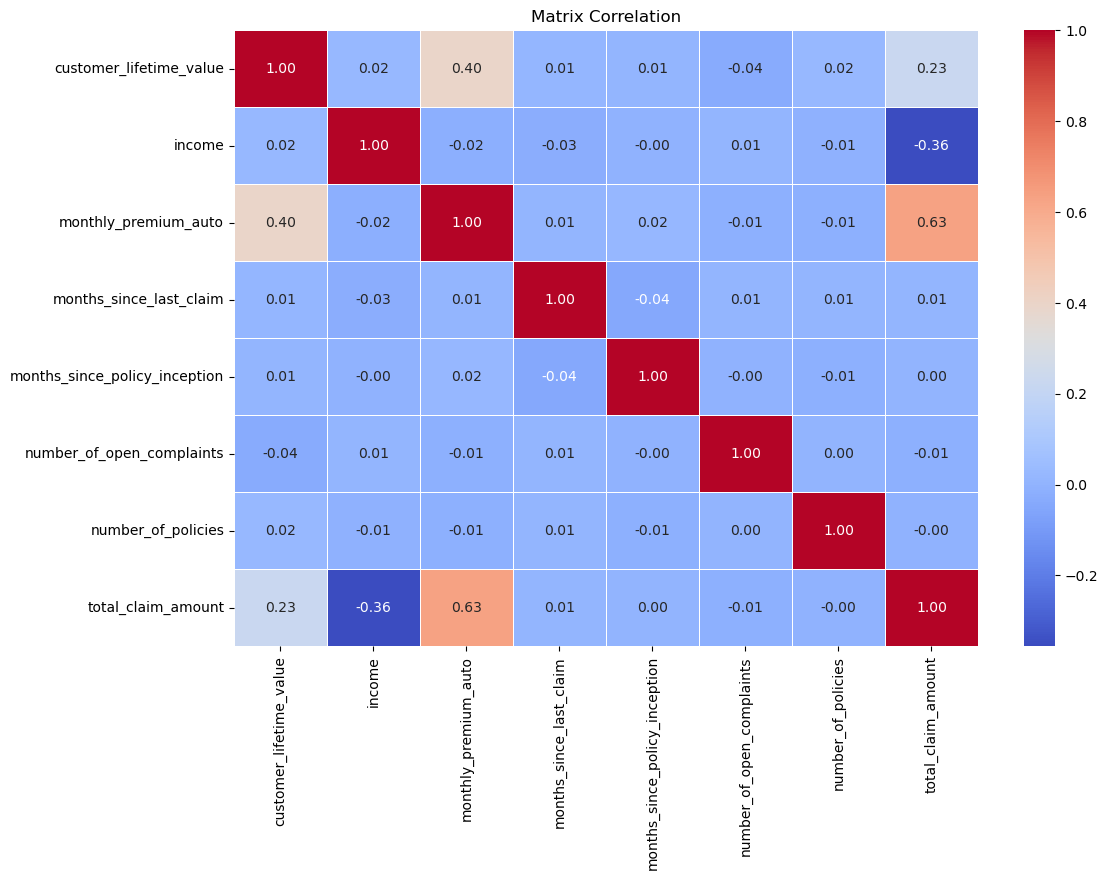

In [9]:
#First select only the numerical columns
#Select the numerical columns
numerical_df=customer_df.select_dtypes(include=np.number)
#Calculate the correlation matrix
correlation_matrix= numerical_df.corr()

#Plot the correlation matrix with heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",fmt=".2f", linewidths=.5)
plt.title("Matrix Correlation")
plt.show()

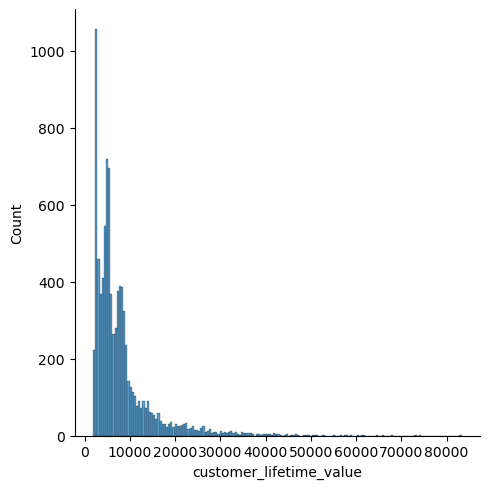

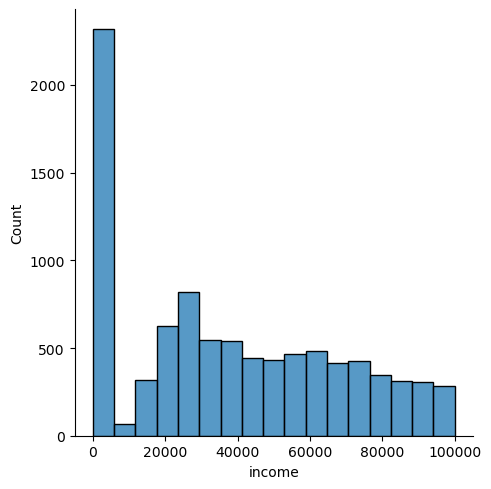

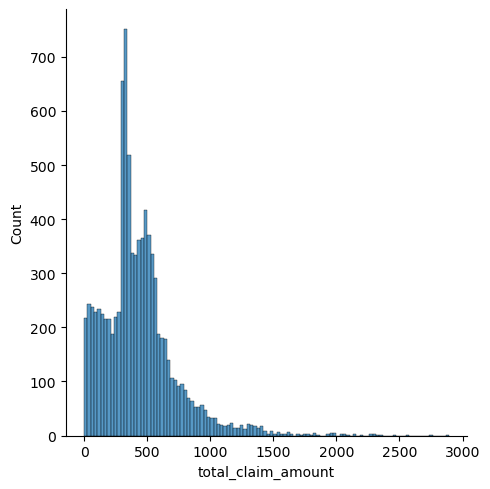

In [10]:
#Plot every continuous variable.
continuous=['customer_lifetime_value','income','total_claim_amount']
for i in continuous:
    sns.displot(customer_df[i])
    plt.show()

### Comment the results
Looking at the continuous values, in terms of customer value, we see some outliers at high values and a high peak at low values.
In income we see a peak at value 0, followed by a drop at the next level and stabilizes from there. 
Regarding the total amount of the claim, the most interesting thing is the increase and peak over 500

In [11]:
## Do the same with the categorical variables 
#Drop the customer_id column
customer_df.drop(['customer'], axis=1,inplace=True)

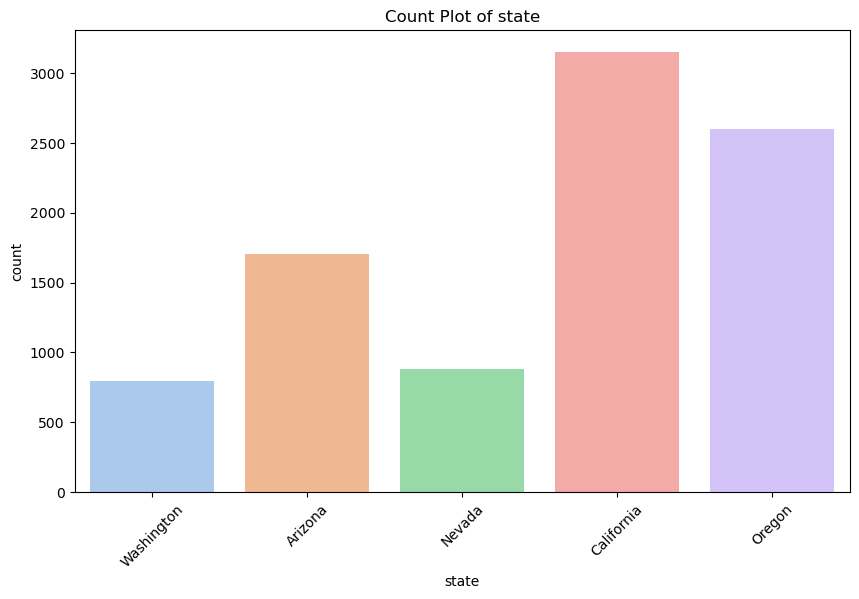

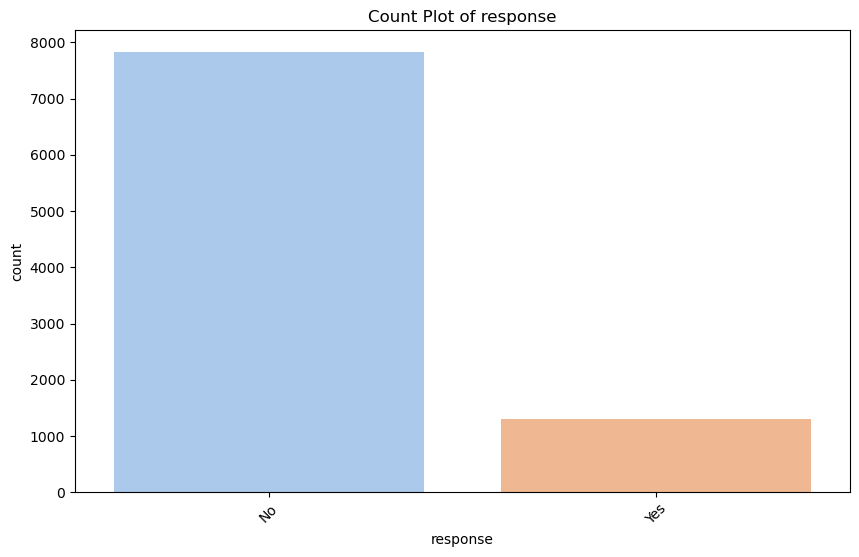

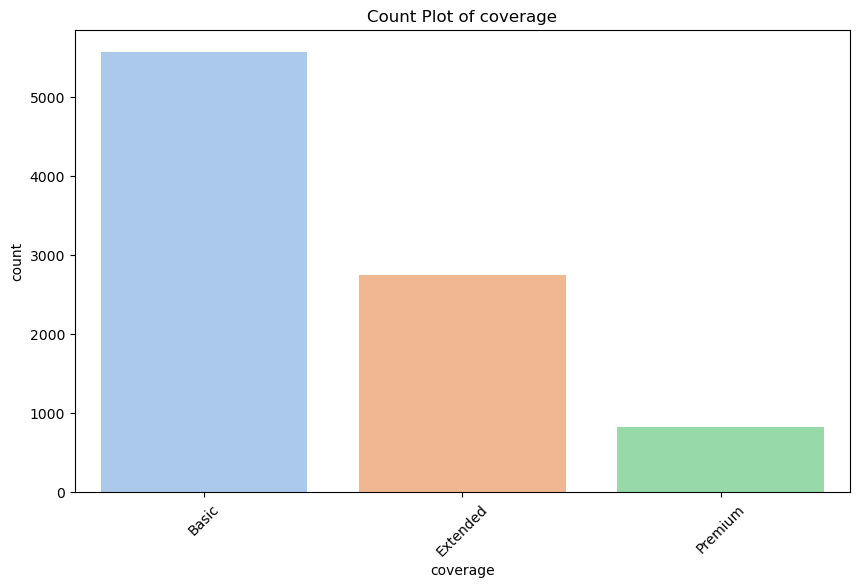

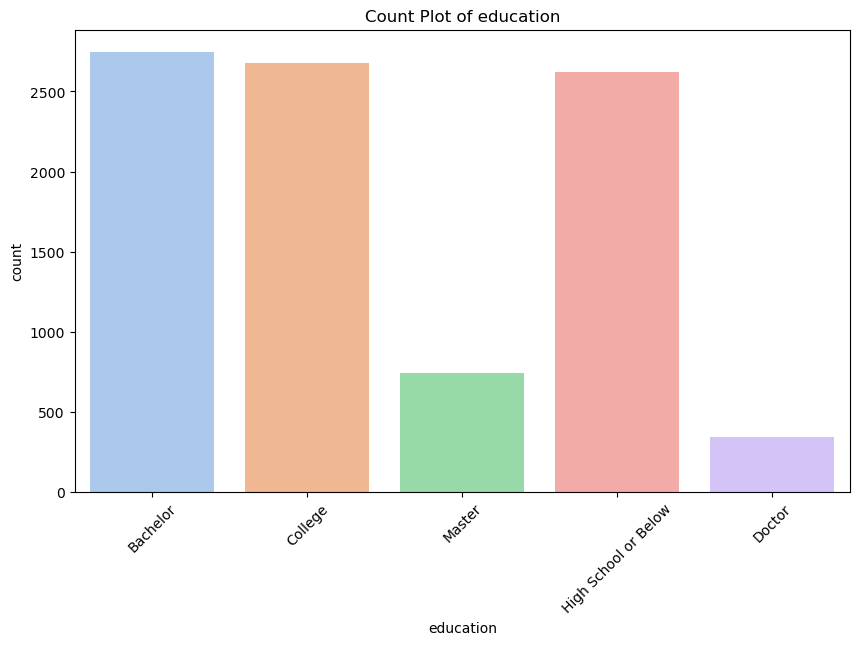

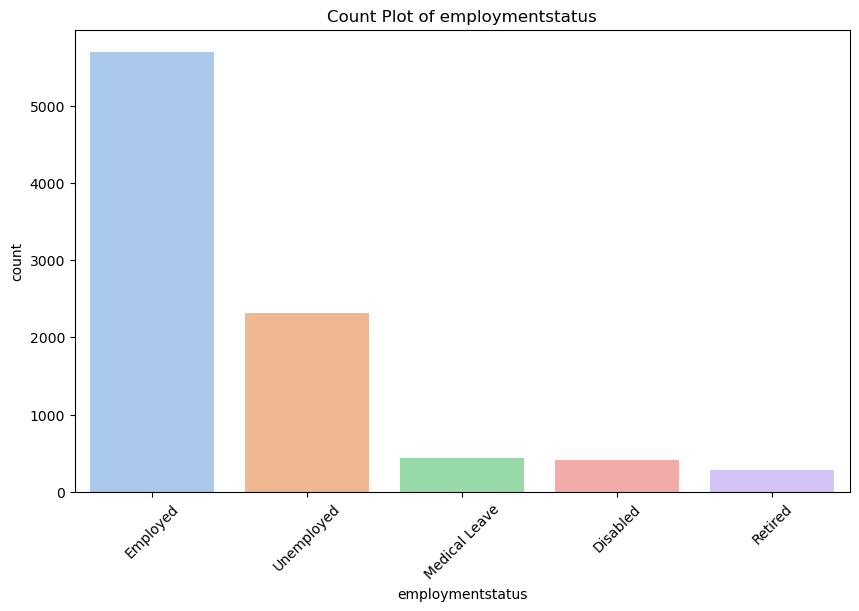

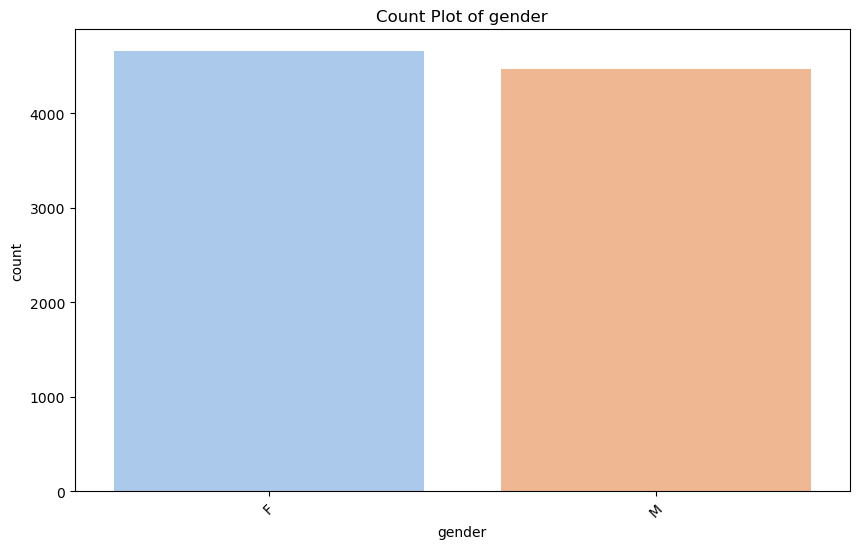

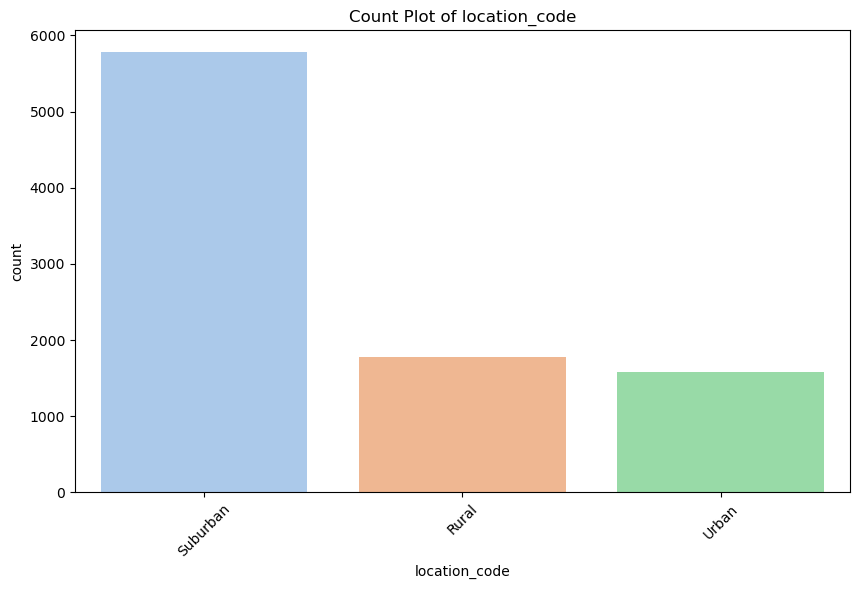

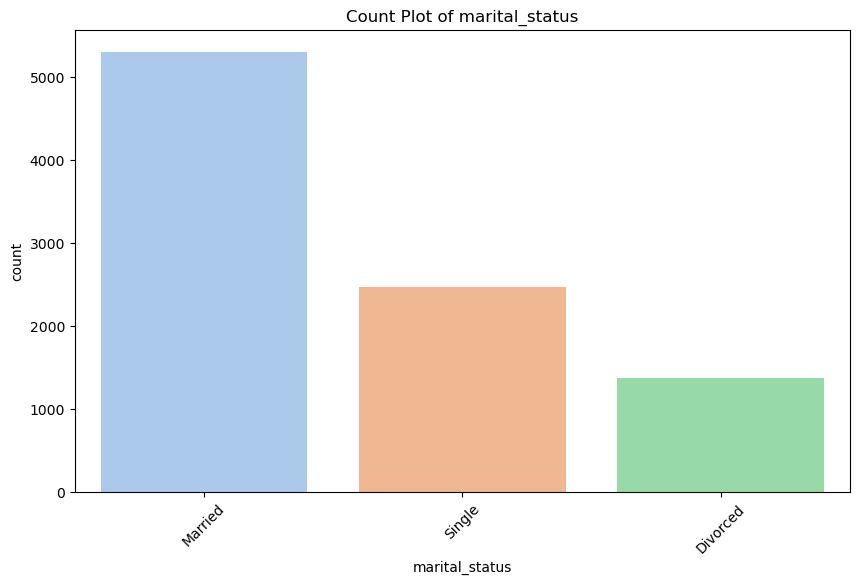

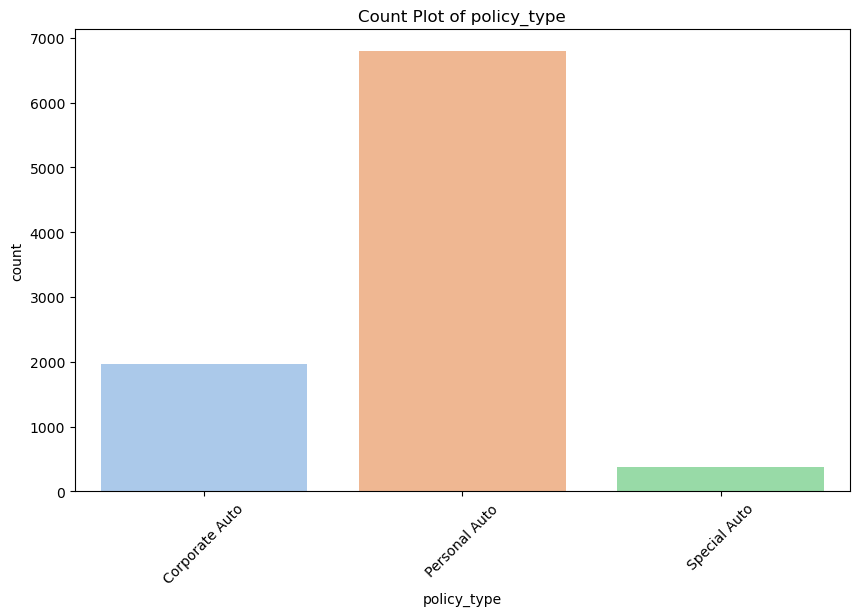

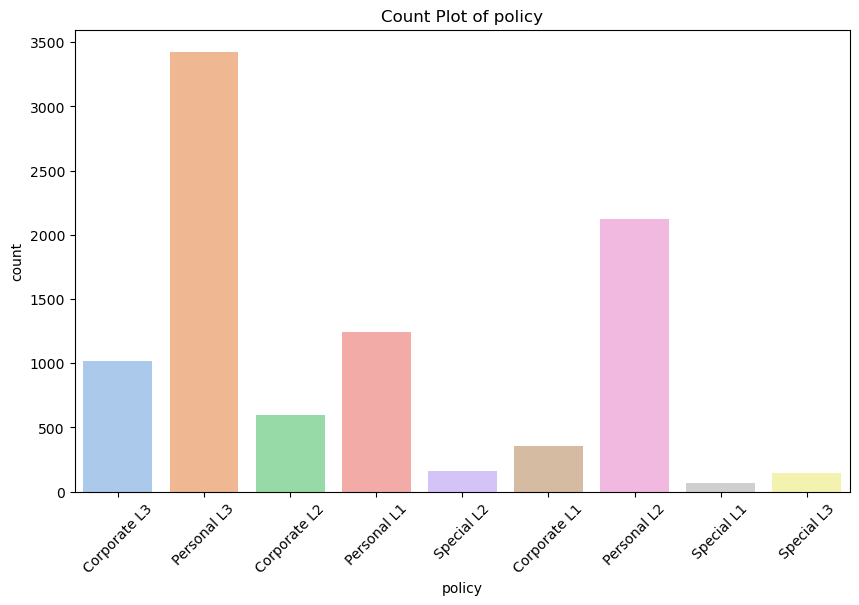

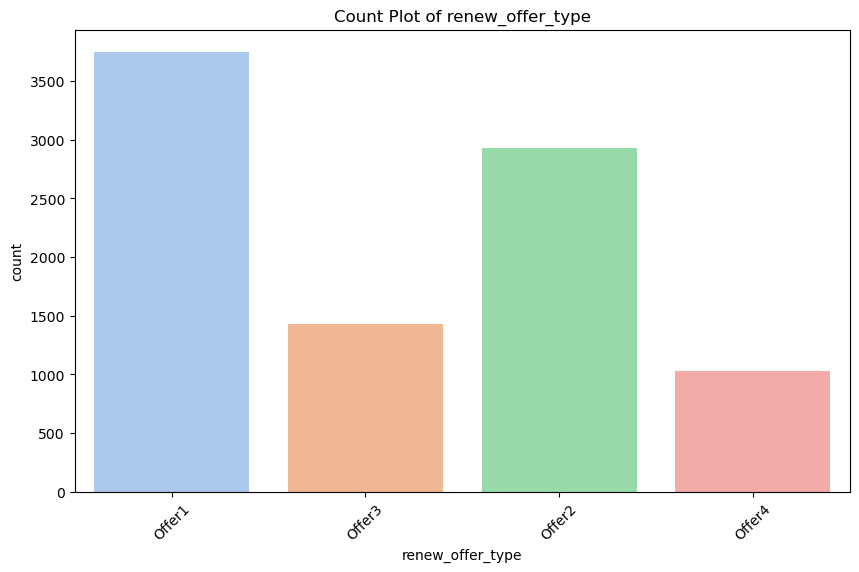

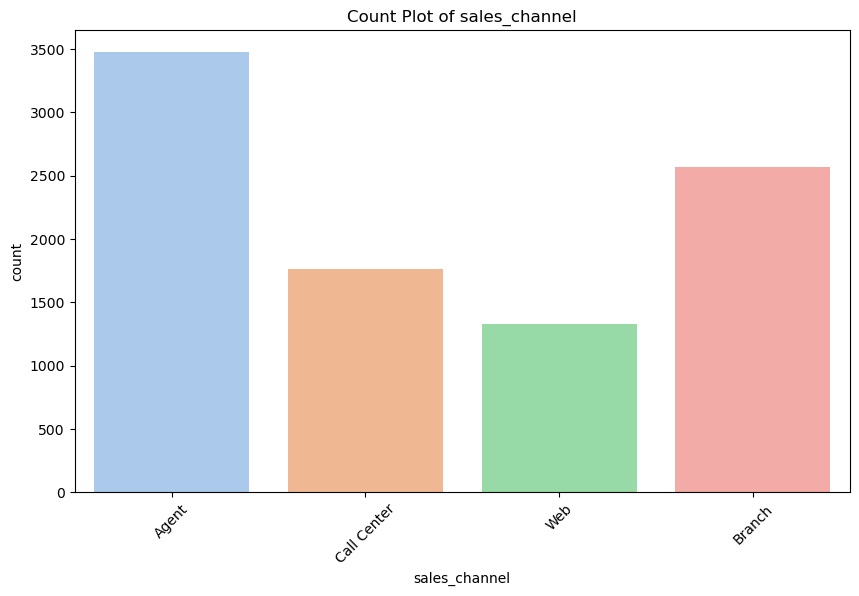

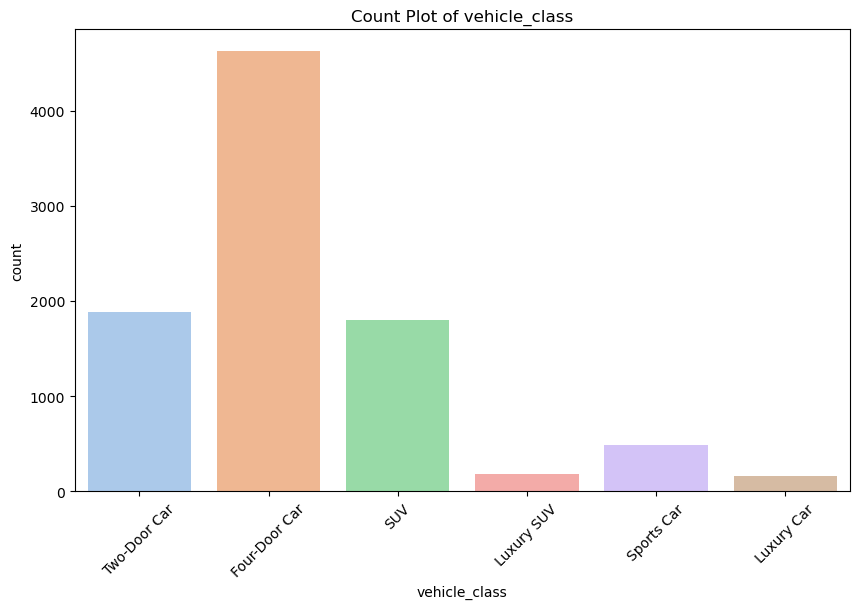

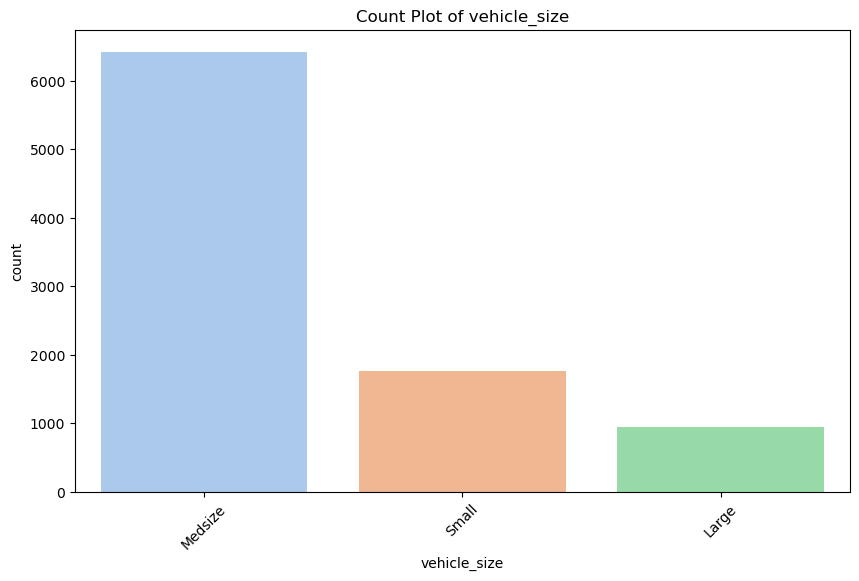

In [12]:
#Plot the categorical variables
for col in customer_df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=customer_df, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Comment the results:
- California is where the most of clients are from, and the second is Oregon, followed by Arizona, and with a 
litle difference between then, Nevada and washington
- There are a big difference between the no and yes of the total´s response
- There's more basic coverages than the rest
- In education, the most people have Bachelor, almost equal College and highSchool, and the las is Master and Doctor
- The most of the clients are employed
- With a litle difference, there are more female than male
- The most of clients are from suburban, and the rest its almost equal between rural and urban
- THe status marietal: the most clients are married, and the last its divorced
- They have more personal auto policies than any other, and there are most of personal L3, Personal L2, Personal l1, Corporate L3, Corporate L2, and the lasts positions Corporate L1, Special L2, Special L3, and Special L1
- The agents and followed by the braches, are the main surce of sales
- The count of vehicle_class the first place its for Four Door Cars, and with a litle difference between Two door cars and SUV
- The clients prefer the medium size for their vehicles

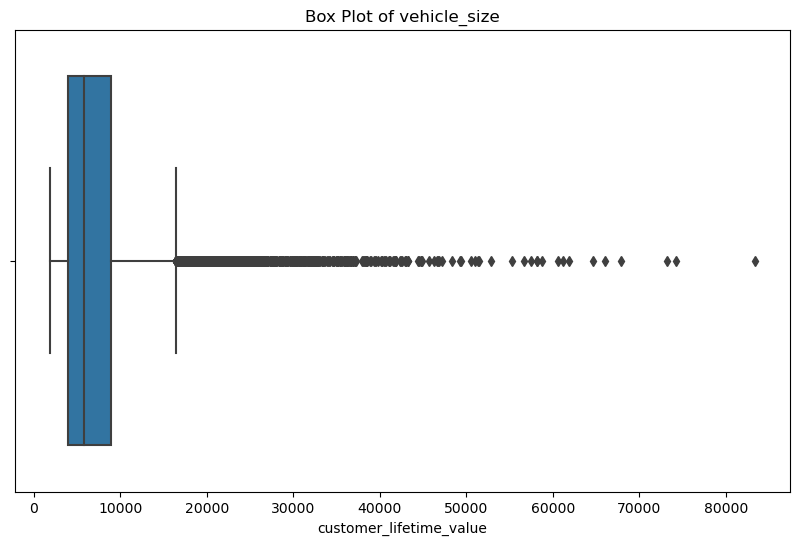

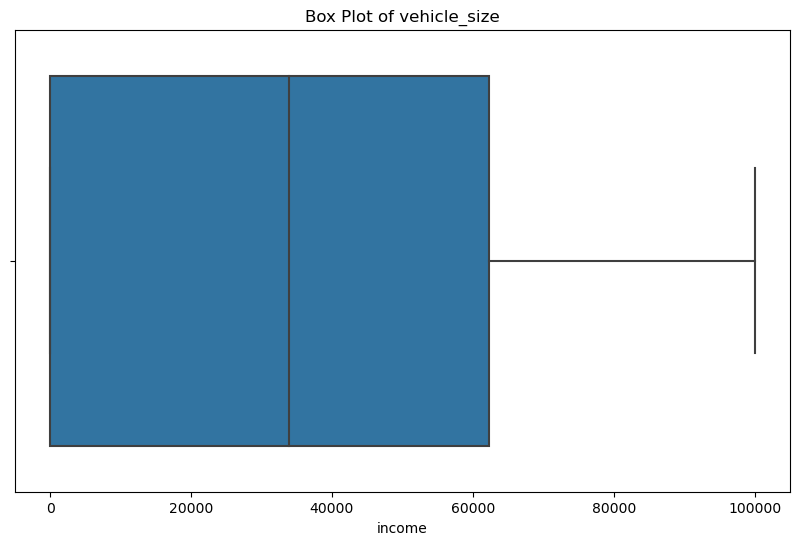

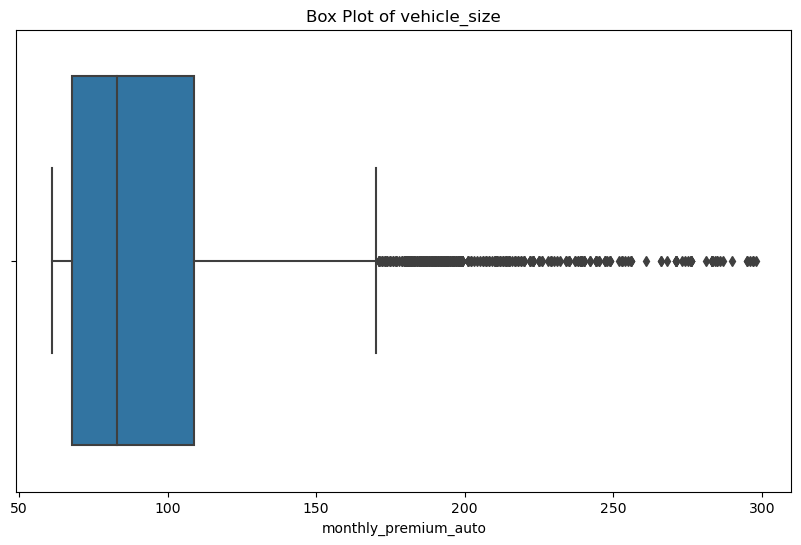

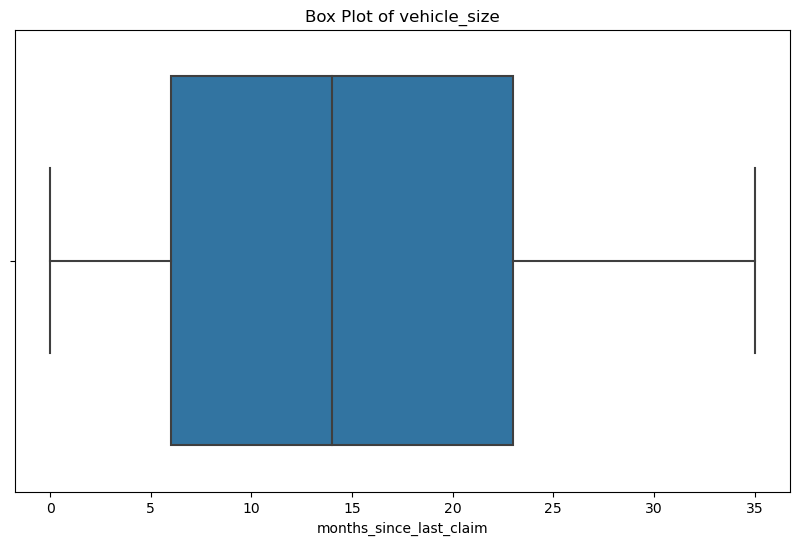

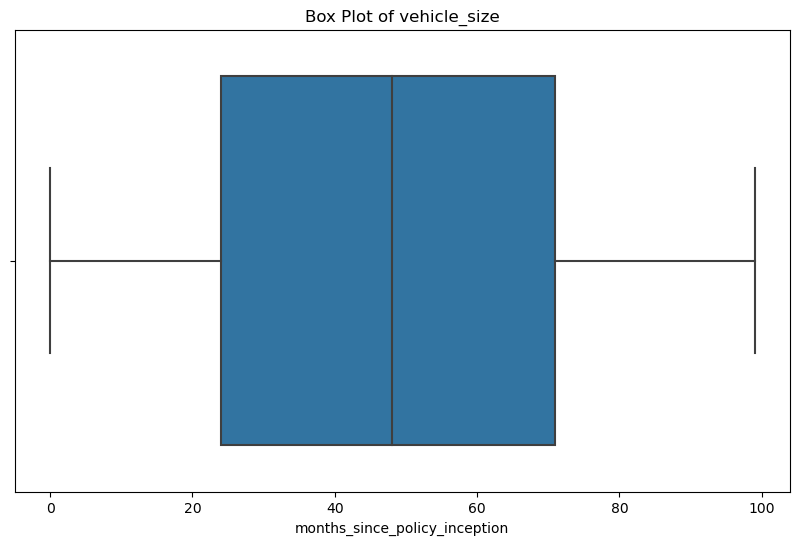

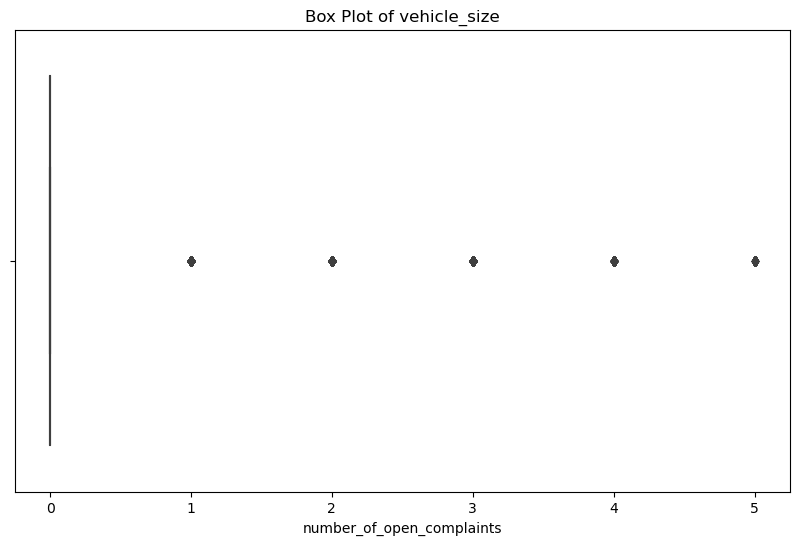

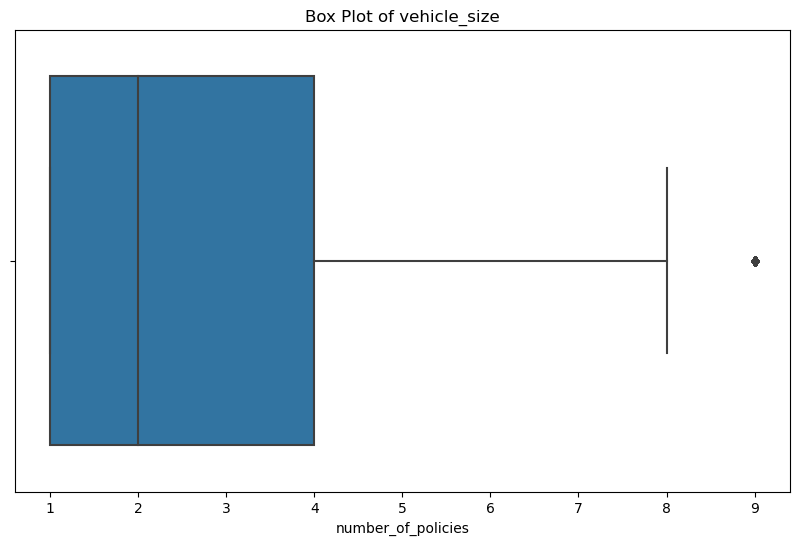

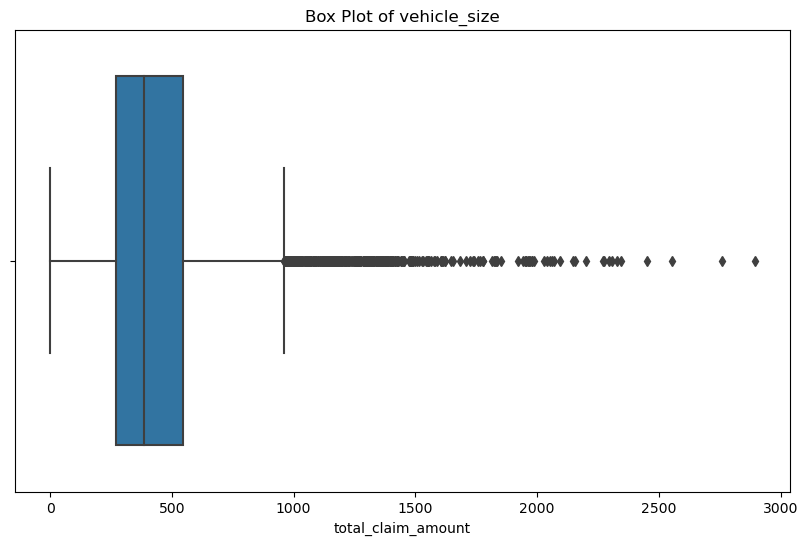

In [13]:
#Step 9. Look for outliers in the continuous variables. 
#(Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with themcolu
#Detect the outliers with boxplot
for column in numerical_df:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=numerical_df[column])
    plt.title(f'Box Plot of {col}')
    plt.show()

### Comment the results:
- Customer life value: there are some many outliers on the higher end, so that mean that some clients have their values more higher than the majority
- Income:with the outliers in the higher end, means than some customer have high income
- Total Claim: follow the last columns, that plots shows that some customers have made large claim compared to the majority

In [14]:
#Check all columns for NaN values. Decide what (if anything) you will need to do with them.
#Check the Nans values
for col in customer_df.columns:
    print(f'{col} has {customer_df[col].isna().sum()} Nan Values')

state has 0 Nan Values
customer_lifetime_value has 0 Nan Values
response has 0 Nan Values
coverage has 0 Nan Values
education has 0 Nan Values
effective_to_date has 0 Nan Values
employmentstatus has 0 Nan Values
gender has 0 Nan Values
income has 0 Nan Values
location_code has 0 Nan Values
marital_status has 0 Nan Values
monthly_premium_auto has 0 Nan Values
months_since_last_claim has 0 Nan Values
months_since_policy_inception has 0 Nan Values
number_of_open_complaints has 0 Nan Values
number_of_policies has 0 Nan Values
policy_type has 0 Nan Values
policy has 0 Nan Values
renew_offer_type has 0 Nan Values
sales_channel has 0 Nan Values
total_claim_amount has 0 Nan Values
vehicle_class has 0 Nan Values
vehicle_size has 0 Nan Values


There are no null values so I think there is not much to analyze at this point.

In [15]:
#Now, CATEGORICAL 
#Splitting the data intro categorical and numerical.
categorical_df= customer_df.select_dtypes(include=['object'])
numerical_df= customer_df.select_dtypes(include=['int64','float64'])

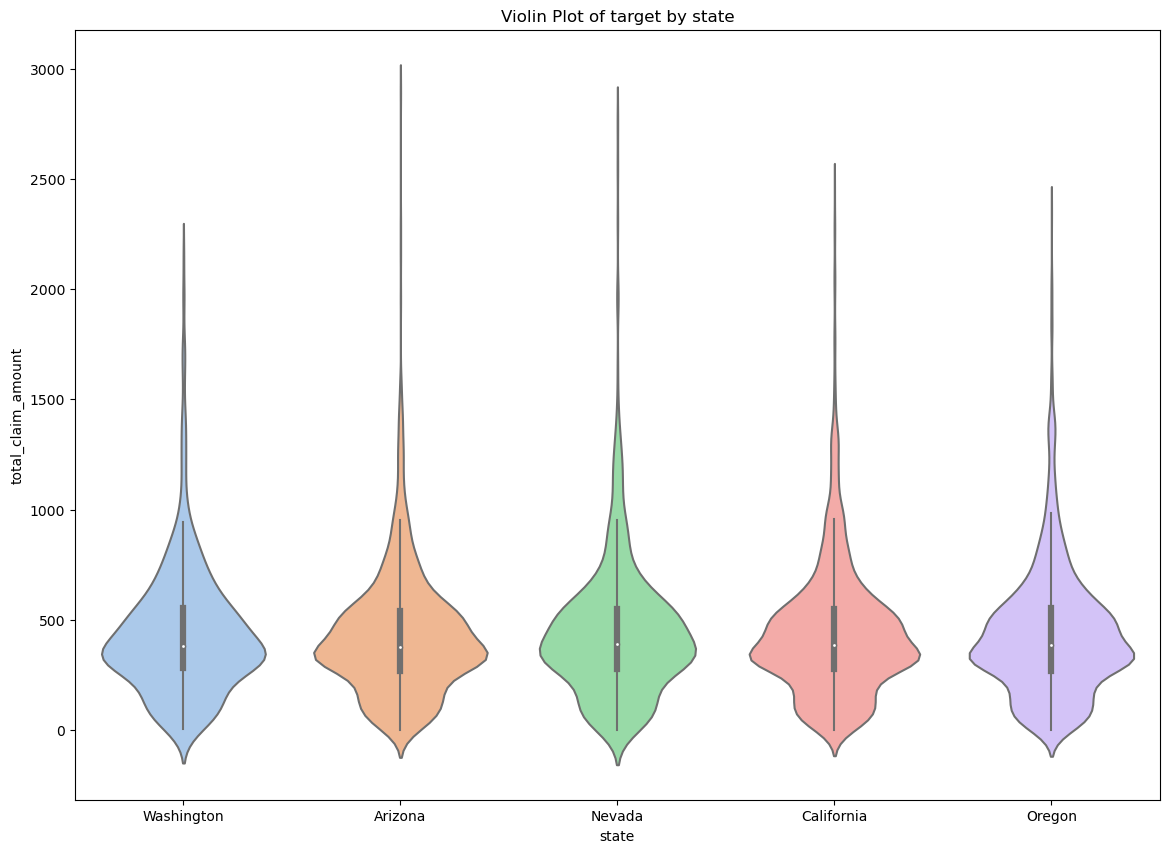

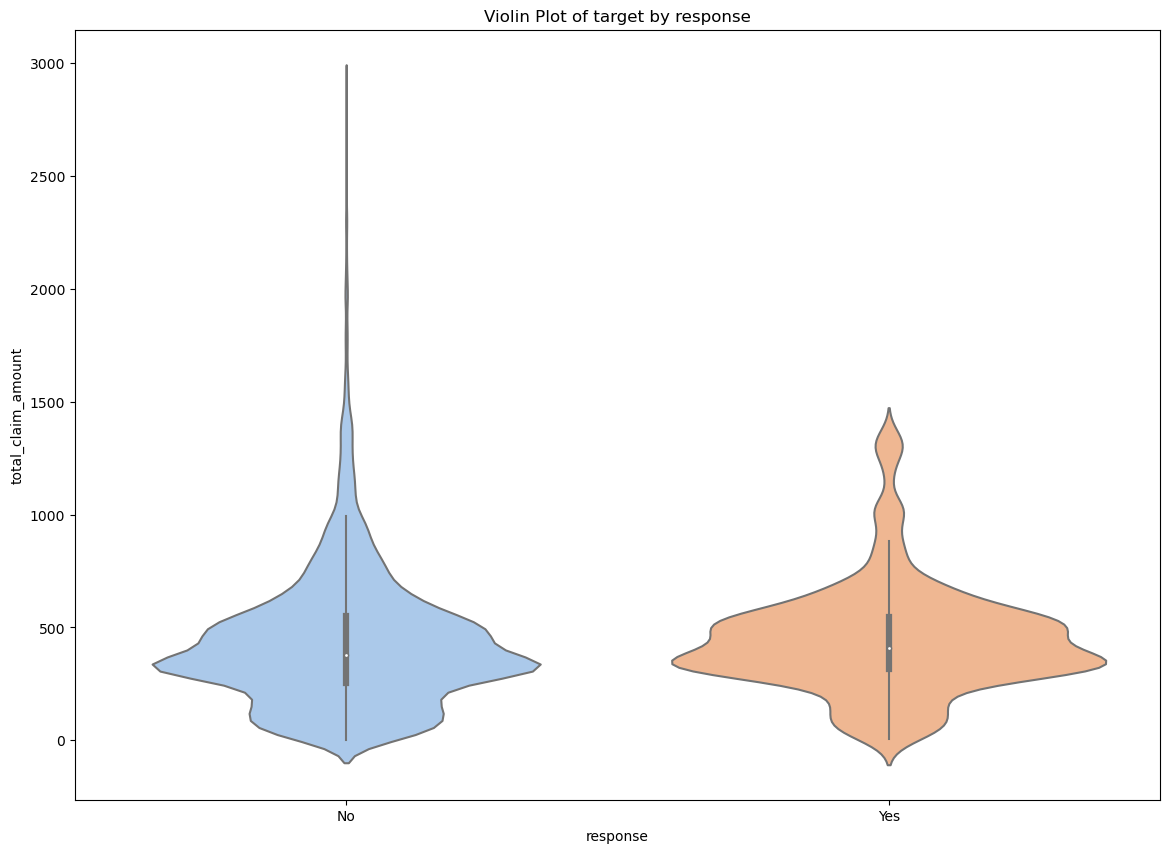

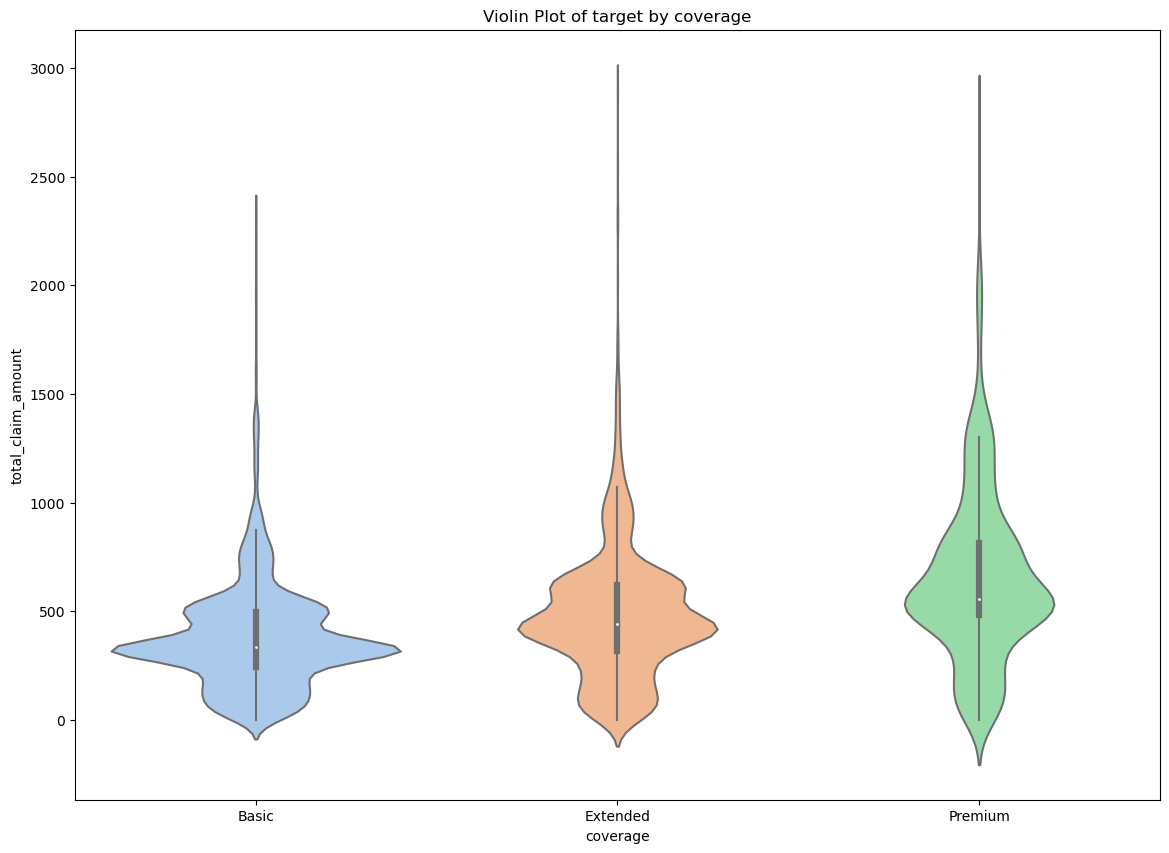

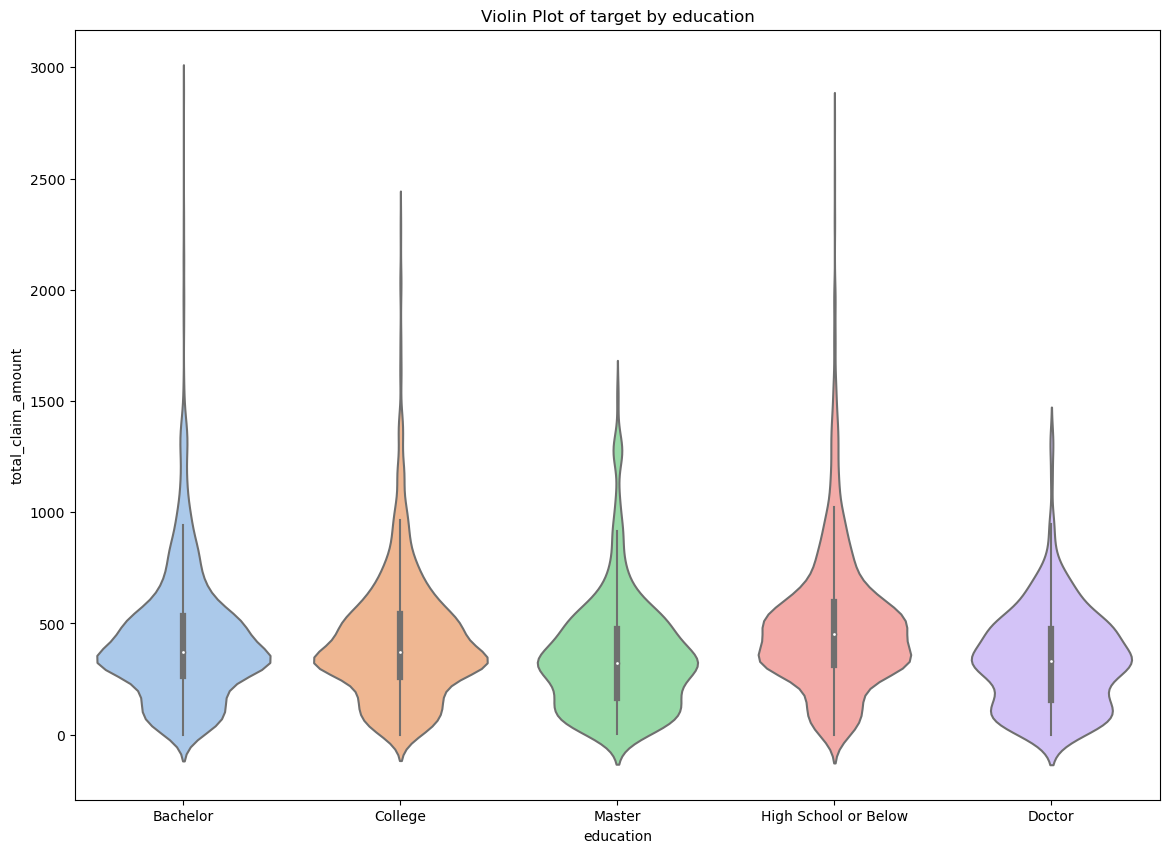

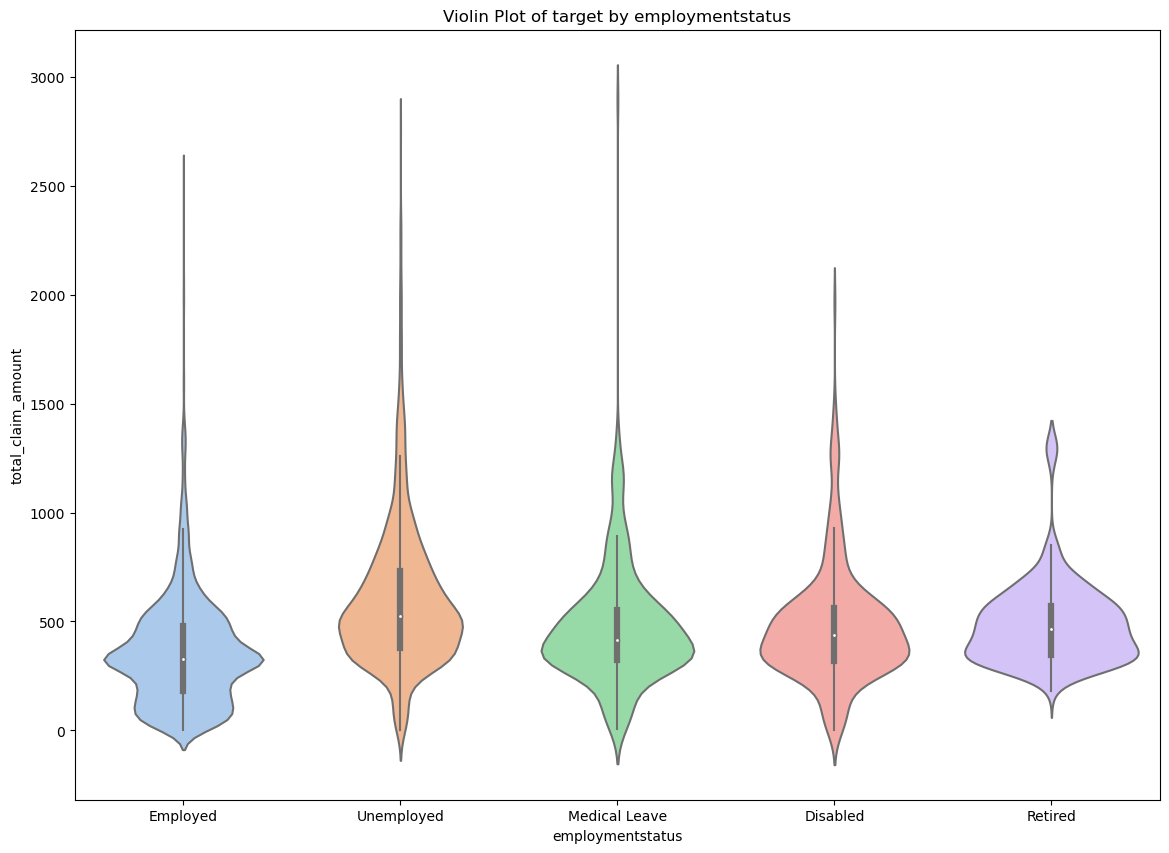

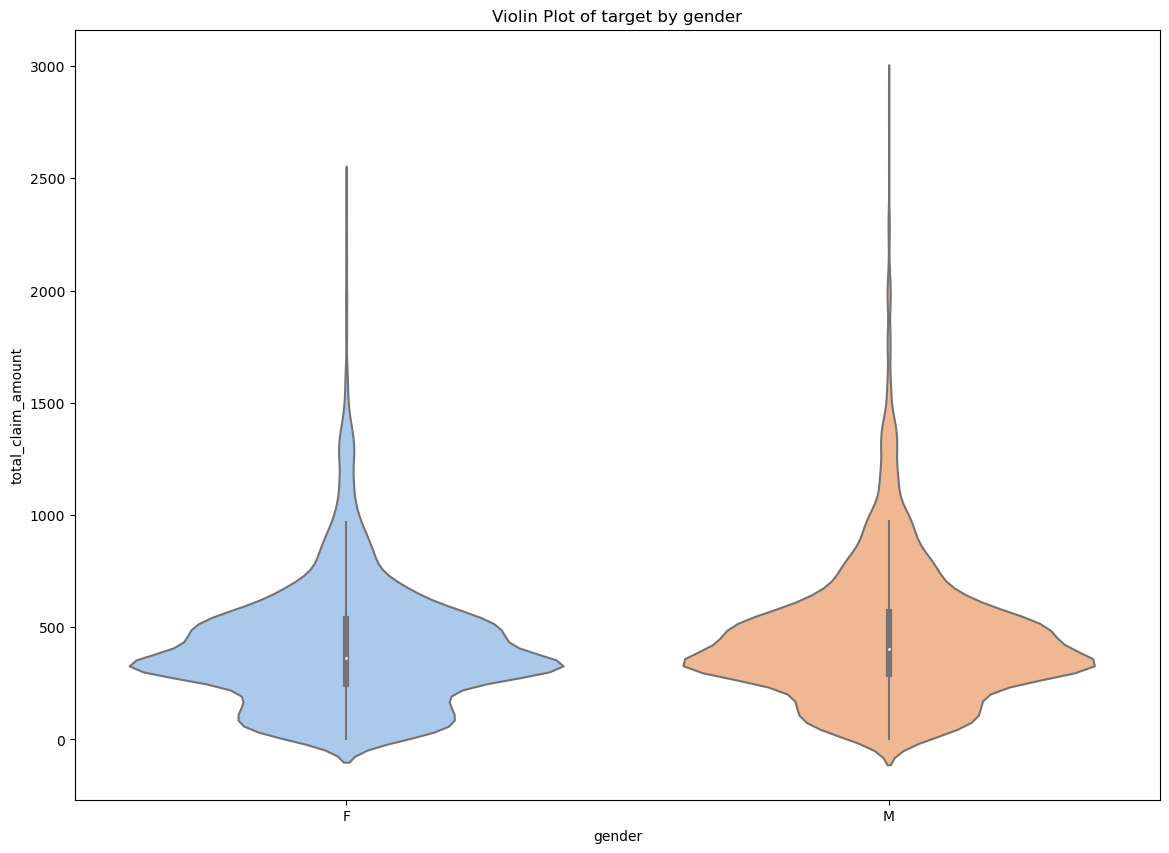

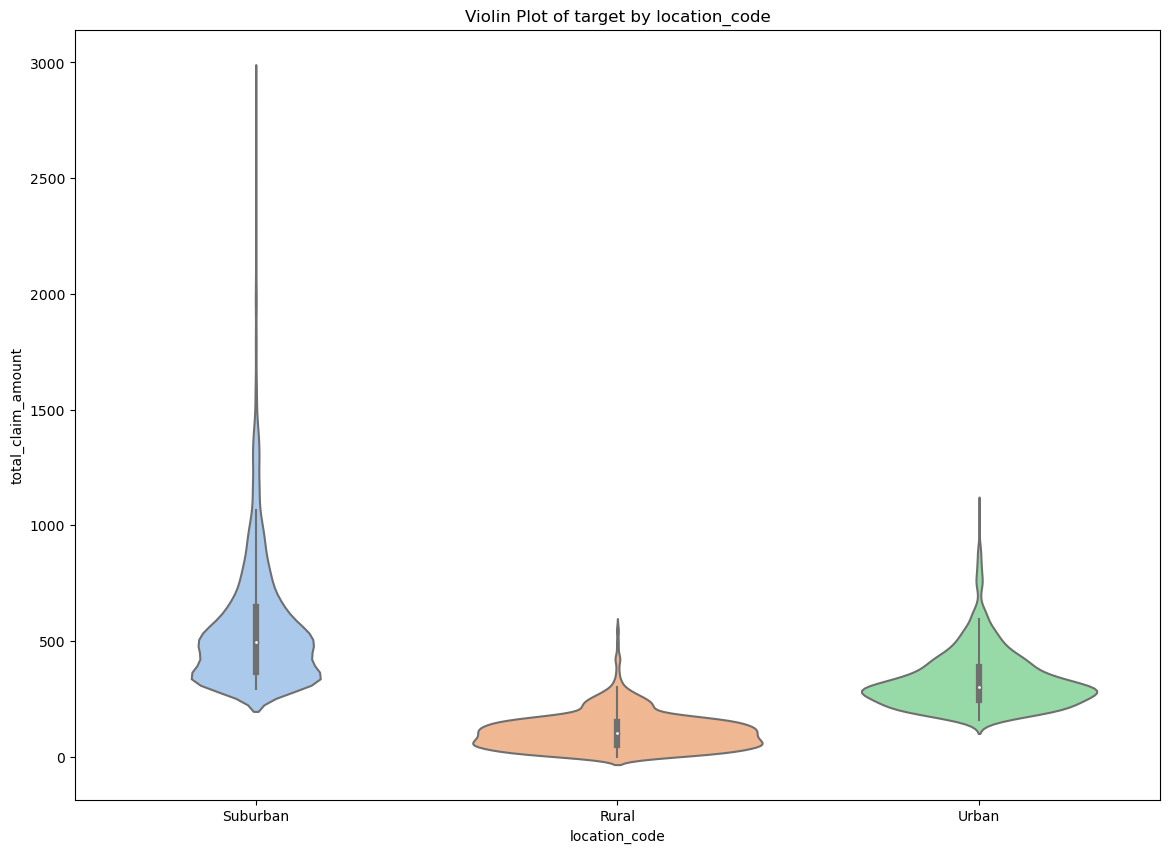

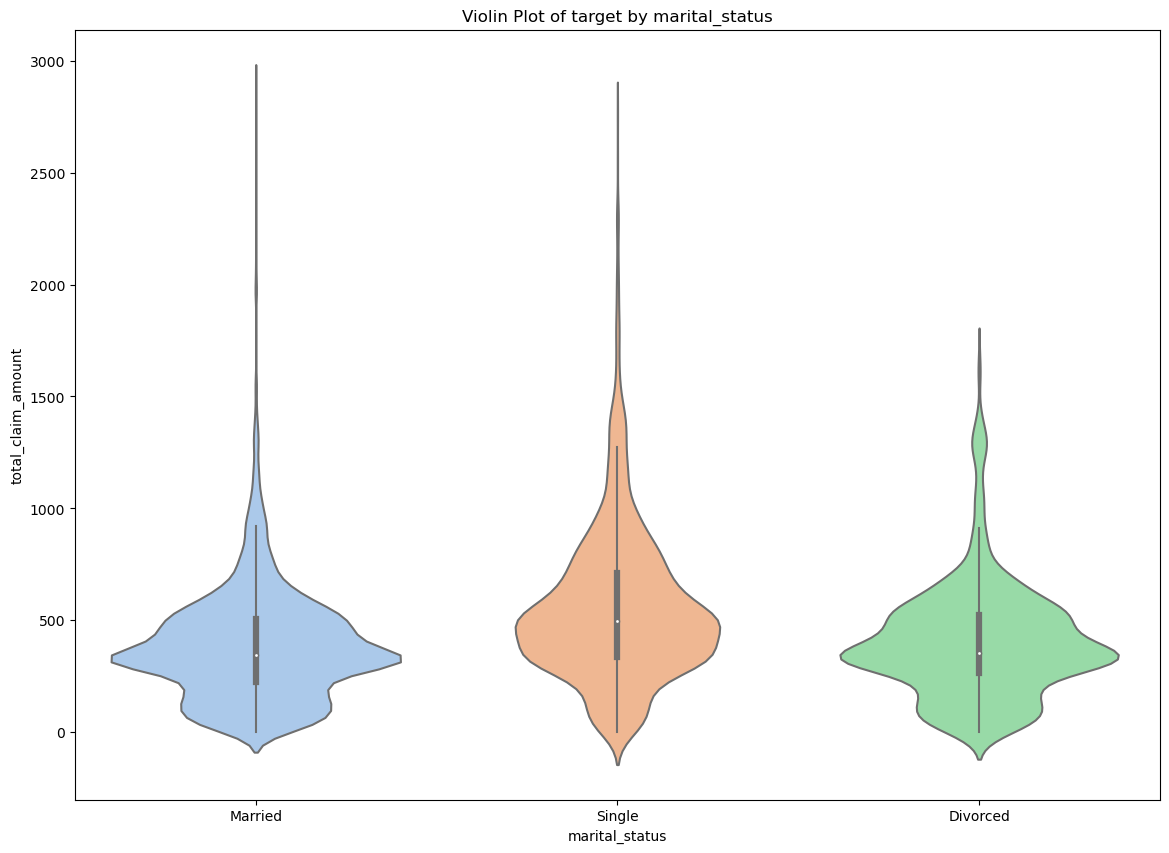

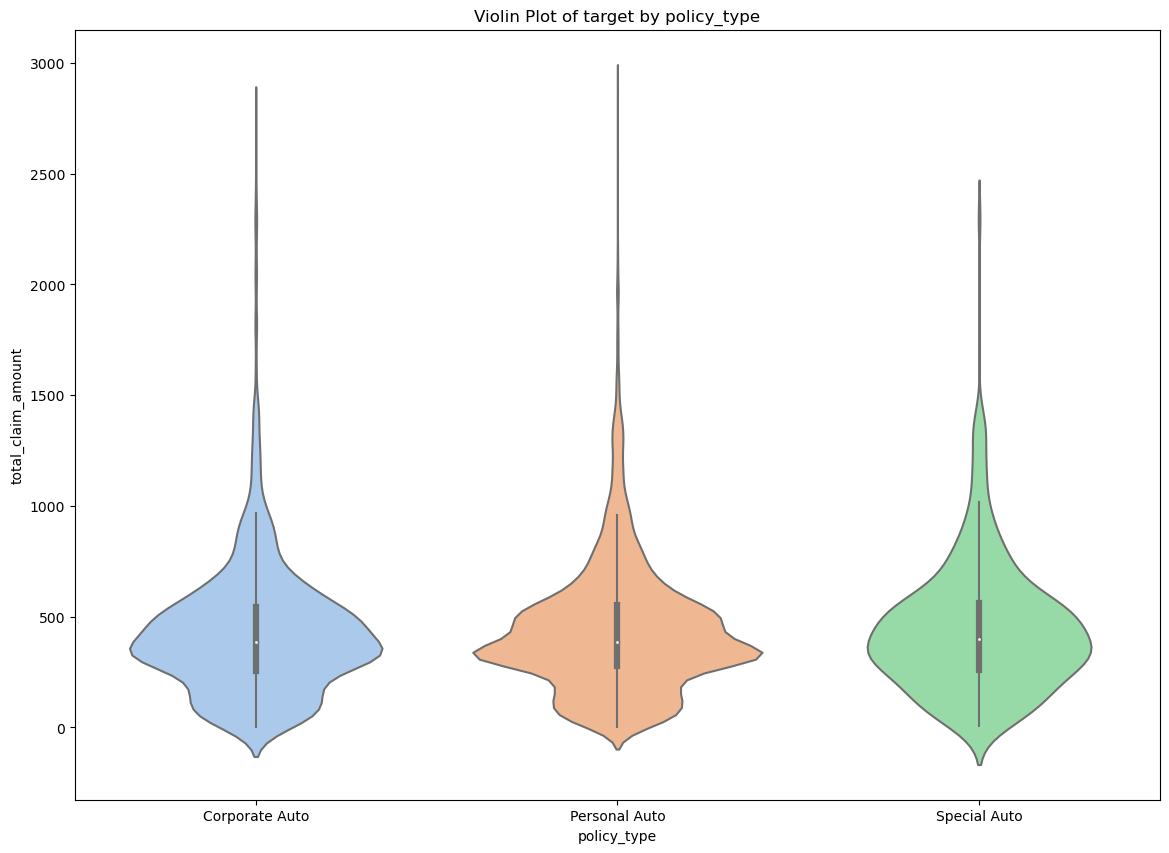

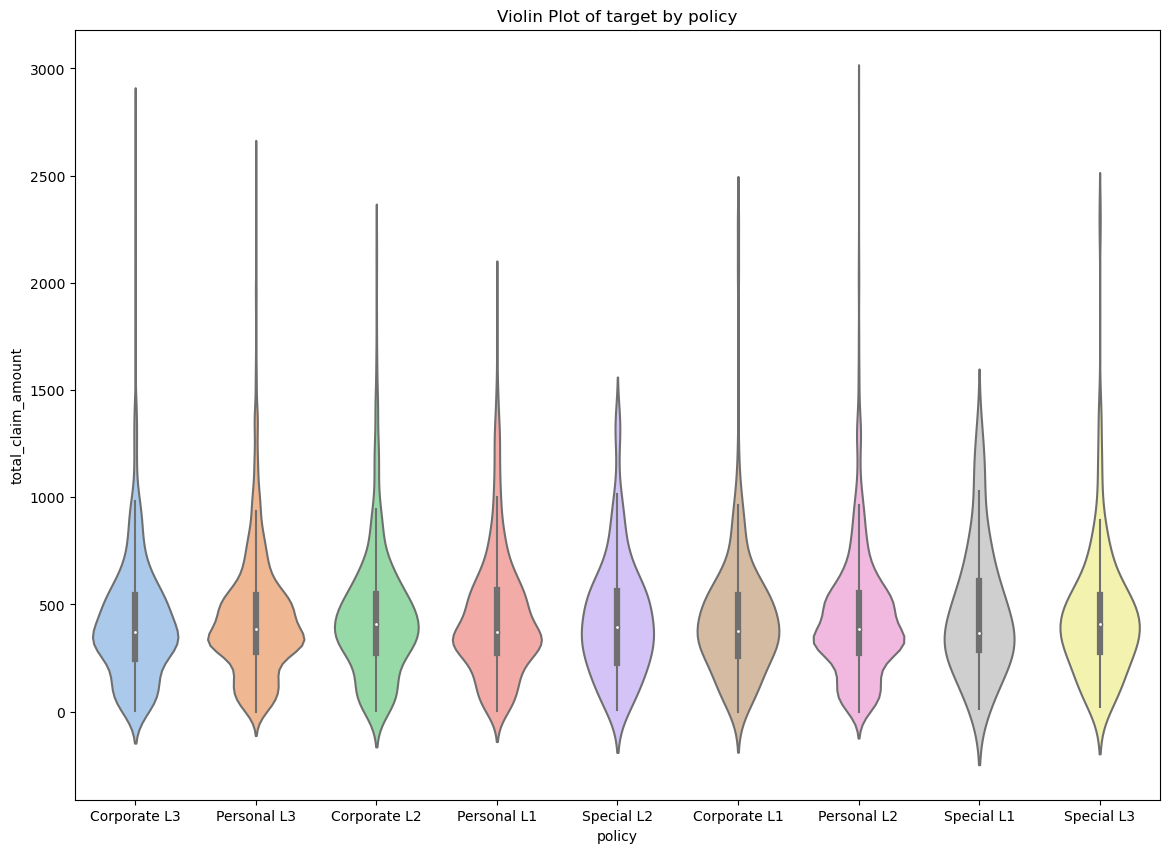

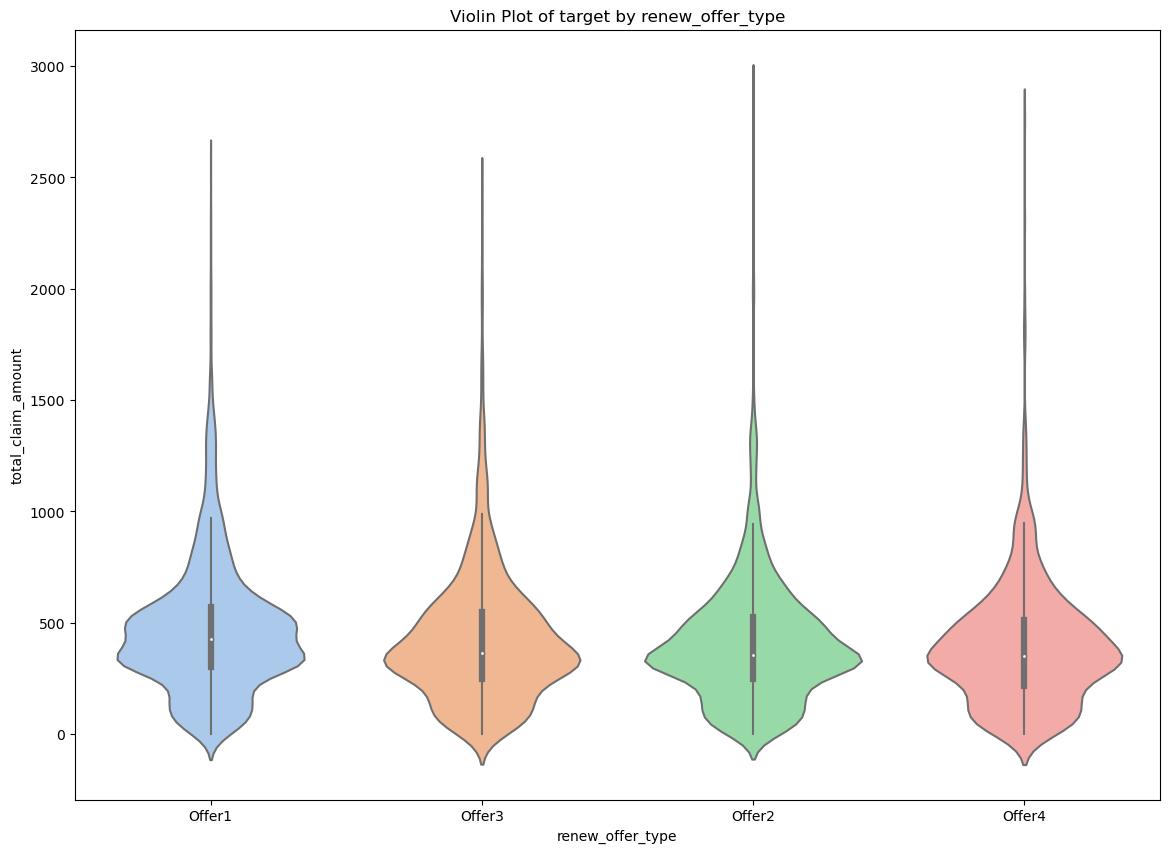

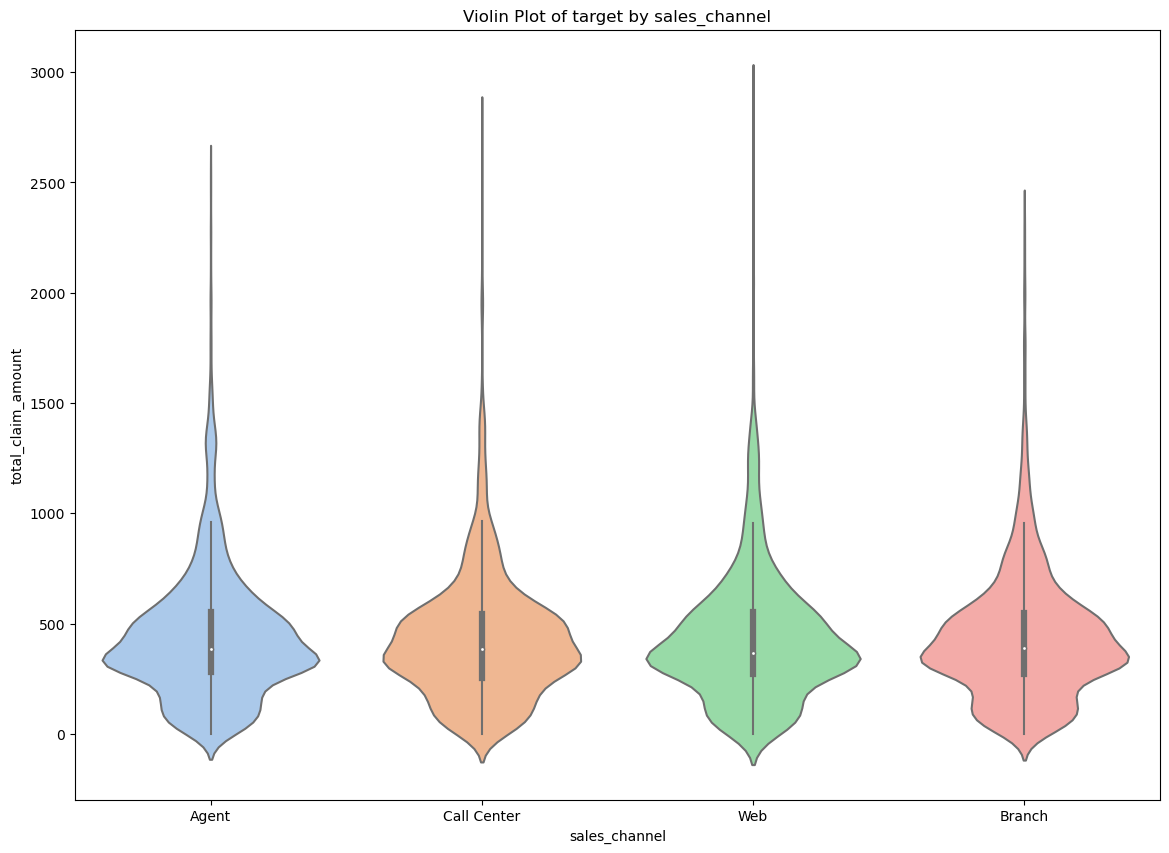

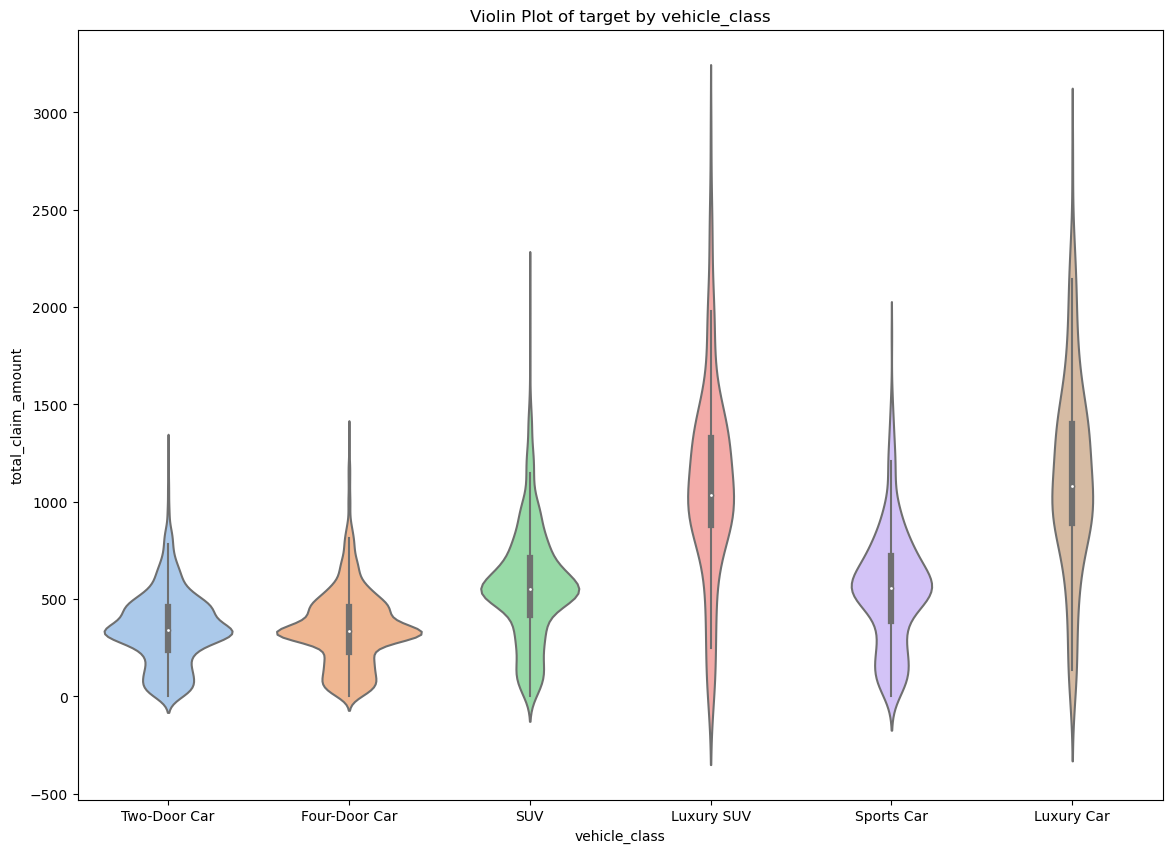

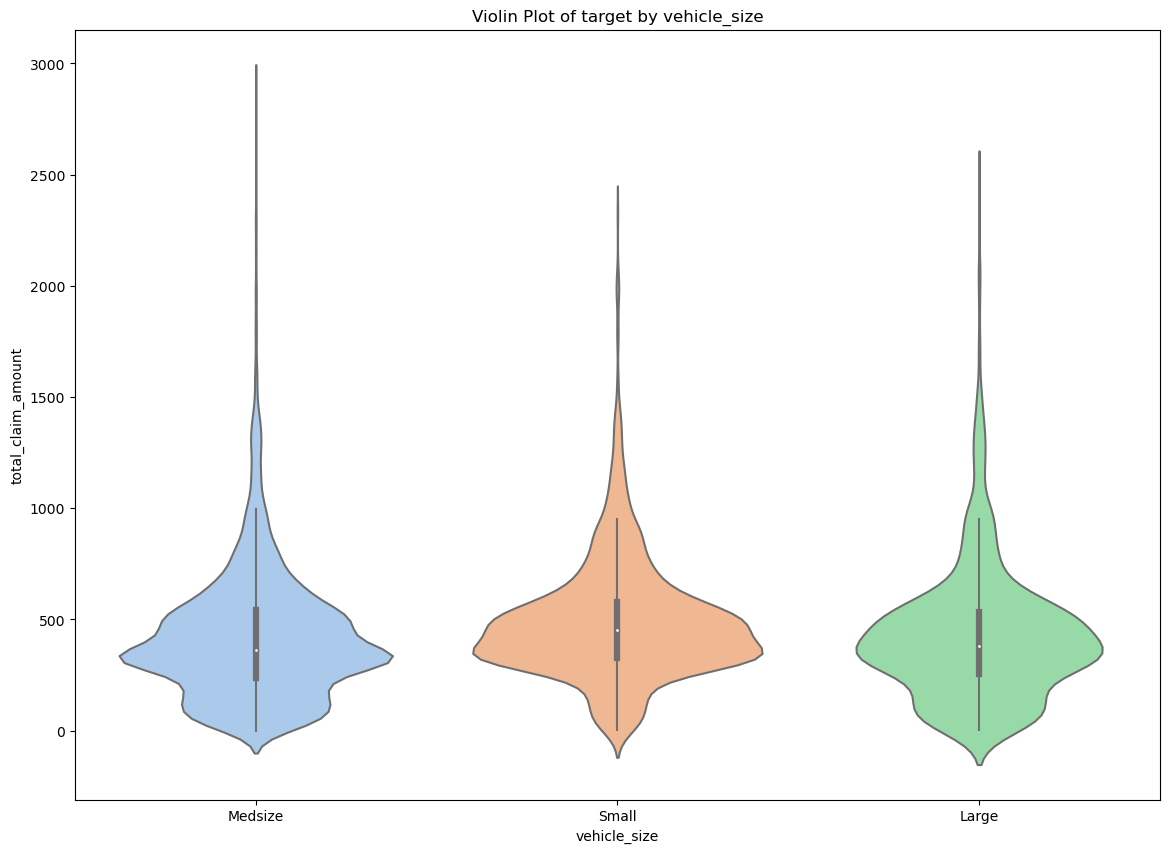

In [16]:
target= customer_df['total_claim_amount']
for col in categorical_df:
    plt.figure(figsize=(14,10))
    sns.violinplot(x=col, y=target, data=categorical_df, palette='pastel', split=True)
    plt.title(f'Violin Plot of target by {col}')
    plt.show()

In [17]:
#Check if there are data cleaning operations to be done 
for col in categorical_df.columns:
    print(f'{col} has {len(categorical_df[col].unique())}unique values')

state has 5unique values
response has 2unique values
coverage has 3unique values
education has 5unique values
employmentstatus has 5unique values
gender has 2unique values
location_code has 3unique values
marital_status has 3unique values
policy_type has 3unique values
policy has 9unique values
renew_offer_type has 4unique values
sales_channel has 4unique values
vehicle_class has 6unique values
vehicle_size has 3unique values


In [18]:
#Check the value counts
for col in categorical_df.columns:
    print(f'{col} value_counts:')
    print(categorical_df[col].value_counts())
    print()

state value_counts:
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response value_counts:
No     7826
Yes    1308
Name: response, dtype: int64

coverage value_counts:
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education value_counts:
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

employmentstatus value_counts:
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

gender value_counts:
F    4658
M    4476
Name: gender, dtype: int64

location_code value_counts:
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status value_counts:
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64


After seeing the results and the graphs I do not think that the categorical values ​​should be cleaned

# LAB FEATURE EXTRACTION

In [19]:
#Get the head for the categorical variables
categorical_df.head()

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

In [20]:
#Dropping the total_claim_amount target column:
numerical_df.drop(['total_claim_amount'], axis=1, inplace=True)
numerical_df.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  
0                          0                   1  
1                          0                   8  
2                          0                   2  
3                          0                   7  
4                          0                   1

In [21]:
#Now its time to do some feature selection for the numerical variables usin VIF
vif= add_constant(numerical_df)
threshold=10

while True:
    values =[variance_inflation_factor(np.array(vif),i)
            for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    #check if the highest vif is bigger than the threshold
    if max(values)>threshold:
        col_index=values.index(max(values))+ 1 #finds the column that has the max vif
        column_name=vif.columns[col_index]  
        vif= vif.drop(column_name, axis=1) #drops that column
    else:
        break
vif

0
number_of_policies             1.001295
number_of_open_complaints      1.001420
income                         1.002301
months_since_policy_inception  1.002441
months_since_last_claim        1.002828
monthly_premium_auto           1.188198
customer_lifetime_value        1.190178

const  customer_lifetime_value  income  monthly_premium_auto  \
0       1.0              2763.519279   56274                    69   
1       1.0              6979.535903       0                    94   
2       1.0             12887.431650   48767                   108   
3       1.0              7645.861827       0                   106   
4       1.0              2813.692575   43836                    73   
...     ...                      ...     ...                   ...   
9129    1.0             23405.987980   71941                    73   
9130    1.0              3096.511217   21604                    79   
9131    1.0              8163.890428       0                    85   
9132    1.0              7524.442436   21941                    96   
9133    1.0              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  
0                             0                   1  
1                             0                   8  
2                             0                   2  
3                             0                   7  
4                             0                   1  
...                         ...                 ...  
9129                          0                   2  
9130                          0                   1  
9131                          3                   2  
9132                          0                   3  
9133                          0                   1  

[9134 rows x 8 columns]

From the results, it is obtained that it is not necessary to eliminate any characteristic, because a score greater than 10 has not been obtained.

In [22]:
#Encoding the categorical variables. First with get dummiesç
dummy_cols = ['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'renew_offer_type' ,'location_code', 'marital_status', 'policy_type', 'policy', 'sales_channel', 'vehicle_class', 'vehicle_size']
categorical_df=pd.get_dummies(categorical_df, columns=dummy_cols)

In [23]:
categorical_df.head()

state_Arizona  state_California  state_Nevada  state_Oregon  \
0              0                 0             0             0   
1              1                 0             0             0   
2              0                 0             1             0   
3              0                 1             0             0   
4              0                 0             0             0   

   state_Washington  response_No  response_Yes  coverage_Basic  \
0                 1            1             0               1   
1                 0            1             0               0   
2                 0            1             0               0   
3                 0            1             0               1   
4                 1            1             0               1   

   coverage_Extended  coverage_Premium  education_Bachelor  education_College  \
0                  0                 0                   1                  0   
1                  1                 0                   1                  0   
2                  0                 1                   1                  0   
3                  0                 0                   1                  0   
4                  0                 0                   1                  0   

   education_Doctor  education_High School or Below  education_Master  \
0                 0                               0                 0   
1                 0                               0                 0   
2                 0                               0                 0   
3                 0                               0                 0   
4                 0                               0                 0   

   employmentstatus_Disabled  employmentstatus_Employed  \
0                          0                          1   
1                          0                          0   
2                          0                          1   
3                          0                          0   
4                          0                          1   

   employmentstatus_Medical Leave  employmentstatus_Retired  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   employmentstatus_Unemployed  gender_F  gender_M  renew_offer_type_Offer1  \
0                            0         1         0                        1   
1                            1         1         0                        0   
2                            0         1         0                        1   
3                            1         0         1                        1   
4                            0         0         1                        1   

   renew_offer_type_Offer2  renew_offer_type_Offer3  renew_offer_type_Offer4  \
0                        0                        0                        0   
1                        0                        1                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   location_code_Rural  location_code_Suburban  location_code_Urban  \
0                    0                       1                    0   
1                    0                       1                    0   
2                    0                       1                    0   
3                    0                       1                    0   
4                    1                       0                    0   

   marital_status_Divorced  marital_status_Married  marital_status_Single  \
0                        0                       1                      0   
1           

In [24]:
#checking the categorical variables using VIF
vif= add_constant(categorical_df.astype(float))
threshold=10

while True:
    values =[variance_inflation_factor(np.array(vif),i)
            for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    #check if the highest vif is bigger than the threshold
    if max(values)>threshold:
        col_index=values.index(max(values))+ 1 #finds the column that has the max vif
        column_name=vif.columns[col_index]  
        vif= vif.drop(column_name, axis=1) #drops that column
    else:
        break
vif

0
policy_type_Personal Auto       1.494052e+04
marital_status_Married          2.089204e+04
coverage_Basic                  4.023796e+04
response_No                     4.482402e+04
location_code_Suburban          4.531534e+04
gender_M                        5.122691e+04
gender_F                        6.659958e+04
policy_type_Corporate Auto      6.885337e+04
state_California                7.696778e+04
vehicle_class_Four-Door Car     8.652973e+04
policy_Corporate L3             8.835427e+04
vehicle_size_Medsize            1.053012e+05
marital_status_Single           1.137370e+05
location_code_Urban             1.810245e+05
renew_offer_type_Offer1         2.431049e+05
state_Washington                2.639529e+05
employmentstatus_Unemployed     3.257413e+05
coverage_Extended               3.640420e+05
policy_Personal L3              5.361535e+05
coverage_Premium                6.414939e+05
state_Oregon                    7.127089e+05
sales_channel_Agent             8.046044e+05
sales_channel_Branch            8.052961e+05
employmentstatus_Employed       1.003789e+06
education_Master                1.004931e+06
policy_Personal L2              1.657245e+06
vehicle_size_Small              2.050946e+06
state_Arizona                   7.983071e+06
renew_offer_type_Offer2         1.028403e+07
employmentstatus_Medical Leave  1.046428e+07
marital_status_Divorced         1.191232e+07
education_Bachelor              1.195843e+07
location_code_Rural             1.245152e+07
state_Nevada                    1.350264e+07
vehicle_class_SUV               1.472606e+07
vehicle_class_Two-Door Car      1.981489e+07
policy_Personal L1              2.255389e+07
employmentstatus_Disabled       2.922418e+07
education_College               6.076980e+07
sales_channel_Web               6.915665e+07
vehicle_class_Luxury SUV        7.690269e+07
sales_channel_Call Center       7.718884e+07
policy_Special L2               9.753938e+07
policy_Corporate L2             1.064829e+08
renew_offer_type_Offer4         1.315833e+08
education_Doctor                2.182507e+08
renew_offer_type_Offer3         2.994246e+08
education_High School or Below  3.455485e+08
vehicle_size_Large              4.196221e+08
employmentstatus_Retired        6.897129e+08
policy_type_Special Auto        7.724325e+08
policy_Special L3               9.046046e+08
vehicle_class_Luxury Car        1.206775e+09
vehicle_class_Sports Car        1.501049e+09
policy_Corporate L1             1.729483e+09
response_Yes                    2.075809e+09
policy_Special L1               4.466379e+09

0
policy_Special L3               3.203848e+00
policy_Special L2               3.437309e+00
employmentstatus_Employed       8.443418e+02
vehicle_size_Medsize            2.073179e+03
coverage_Basic                  6.462621e+03
gender_F                        8.411583e+03
response_No                     1.708230e+04
location_code_Suburban          2.147304e+04
gender_M                        3.256486e+04
location_code_Urban             4.119969e+04
policy_type_Personal Auto       1.099432e+05
state_California                1.480482e+05
vehicle_class_Four-Door Car     1.515356e+05
state_Washington                1.679806e+05
sales_channel_Agent             2.297966e+05
employmentstatus_Unemployed     2.326203e+05
policy_Corporate L3             3.660880e+05
marital_status_Single           4.065556e+05
education_Master                4.788797e+05
coverage_Premium                5.591727e+05
state_Oregon                    5.931468e+05
renew_offer_type_Offer1         9.415187e+05
policy_type_Corporate Auto      1.057768e+06
state_Nevada                    1.501632e+06
coverage_Extended               1.986215e+06
vehicle_class_Two-Door Car      2.106704e+06
renew_offer_type_Offer4         2.214764e+06
education_Bachelor              3.616147e+06
policy_Personal L3              5.213504e+06
renew_offer_type_Offer3         7.439803e+06
sales_channel_Branch            7.825753e+06
education_College               7.882299e+06
location_code_Rural             1.096417e+07
employmentstatus_Medical Leave  1.167046e+07
marital_status_Married          1.288820e+07
sales_channel_Web               1.771156e+07
marital_status_Divorced         2.277898e+07
sales_channel_Call Center       2.514895e+07
state_Arizona                   2.766528e+07
policy_Personal L1              3.229338e+07
employmentstatus_Disabled       4.063627e+07
policy_Personal L2              4.667176e+07
education_High School or Below  4.954813e+07
renew_offer_type_Offer2         6.215570e+07
vehicle_size_Large              6.512950e+07
policy_Corporate L2             7.212564e+07
vehicle_class_SUV               7.213072e+07
vehicle_size_Small              1.958516e+08
vehicle_class_Luxury Car        4.291660e+08
policy_Corporate L1             4.460945e+08
policy_type_Special Auto        8.140566e+08
response_Yes                    1.451409e+09
vehicle_class_Luxury SUV        1.654563e+09
employmentstatus_Retired        3.423134e+09
education_Doctor                3.432869e+09
vehicle_class_Sports Car        1.228890e+10

0
vehicle_class_Luxury Car        1.325088e+00
vehicle_class_Luxury SUV        1.360800e+00
policy_Special L3               3.203850e+00
policy_Special L2               3.437313e+00
vehicle_class_SUV               3.808367e+00
vehicle_class_Two-Door Car      3.924930e+00
vehicle_class_Four-Door Car     5.256943e+00
vehicle_size_Medsize            4.482096e+03
policy_type_Personal Auto       4.733887e+03
employmentstatus_Employed       7.801190e+03
coverage_Basic                  1.739909e+04
marital_status_Married          2.689530e+04
location_code_Suburban          3.297597e+04
policy_Corporate L3             3.670934e+04
coverage_Premium                4.932486e+04
marital_status_Single           6.597165e+04
response_No                     6.818426e+04
gender_M                        8.394176e+04
state_Oregon                    8.418967e+04
education_Master                1.572947e+05
state_California                2.261652e+05
state_Washington                2.698572e+05
location_code_Urban             3.984876e+05
sales_channel_Agent             5.924216e+05
policy_type_Corporate Auto      6.498471e+05
employmentstatus_Unemployed     7.275458e+05
renew_offer_type_Offer1         7.402844e+05
policy_Personal L2              8.573037e+05
education_College               1.139071e+06
education_Bachelor              1.179471e+06
renew_offer_type_Offer3         1.408111e+06
policy_Personal L3              1.413572e+06
coverage_Extended               1.570038e+06
state_Nevada                    2.155423e+06
gender_F                        3.450357e+06
location_code_Rural             5.317556e+06
education_High School or Below  5.813008e+06
policy_type_Special Auto        6.403717e+06
policy_Corporate L2             7.446096e+06
employmentstatus_Medical Leave  8.491453e+06
state_Arizona                   1.654526e+07
employmentstatus_Disabled       1.832904e+07
renew_offer_type_Offer2         2.027950e+07
sales_channel_Branch            2.056912e+07
policy_Corporate L1             2.977888e+07
marital_status_Divorced         3.065725e+07
policy_Personal L1              3.249807e+07
renew_offer_type_Offer4         3.258408e+07
sales_channel_Call Center       3.292470e+07
sales_channel_Web               5.896490e+07
vehicle_size_Small              9.973814e+07
vehicle_size_Large              1.271968e+08
response_Yes                    8.815233e+08
education_Doctor                3.355919e+09
employmentstatus_Retired        3.599408e+09

0
vehicle_class_Luxury Car        1.325086e+00
vehicle_class_Luxury SUV        1.360792e+00
employmentstatus_Disabled       2.479611e+00
employmentstatus_Medical Leave  2.562963e+00
policy_Special L3               3.203847e+00
policy_Special L2               3.437083e+00
vehicle_class_SUV               3.808371e+00
vehicle_class_Two-Door Car      3.924972e+00
vehicle_class_Four-Door Car     5.253904e+00
employmentstatus_Unemployed     7.826681e+00
employmentstatus_Employed       9.133858e+00
policy_type_Personal Auto       9.766384e+03
gender_M                        1.371960e+04
coverage_Basic                  1.779634e+04
location_code_Suburban          2.653384e+04
response_No                     3.382307e+04
gender_F                        3.755473e+04
policy_Corporate L3             7.017315e+04
policy_type_Corporate Auto      1.313974e+05
policy_Personal L3              1.375935e+05
vehicle_size_Medsize            1.674383e+05
marital_status_Single           1.679881e+05
education_Master                1.829669e+05
location_code_Urban             1.897508e+05
sales_channel_Agent             1.952481e+05
renew_offer_type_Offer1         2.825673e+05
coverage_Premium                2.896863e+05
state_California                3.604502e+05
state_Oregon                    3.843649e+05
state_Washington                4.970361e+05
coverage_Extended               6.702190e+05
location_code_Rural             9.132508e+05
education_Bachelor              1.599446e+06
marital_status_Married          1.720274e+06
renew_offer_type_Offer2         2.592936e+06
education_High School or Below  3.233502e+06
education_College               5.308513e+06
renew_offer_type_Offer3         1.671944e+07
state_Nevada                    1.760196e+07
sales_channel_Web               2.576103e+07
policy_Corporate L2             2.791795e+07
state_Arizona                   3.071403e+07
policy_Personal L2              3.670746e+07
vehicle_size_Small              3.786655e+07
marital_status_Divorced         4.139736e+07
sales_channel_Branch            8.626777e+07
policy_Personal L1              1.085568e+08
vehicle_size_Large              1.295065e+08
sales_channel_Call Center       2.245337e+08
policy_type_Special Auto        2.783212e+08
response_Yes                    5.073110e+08
renew_offer_type_Offer4         5.247659e+08
policy_Corporate L1             6.677134e+08
education_Doctor                5.312148e+09

0
vehicle_class_Luxury Car        1.325094e+00
vehicle_class_Luxury SUV        1.360801e+00
employmentstatus_Disabled       2.480161e+00
employmentstatus_Medical Leave  2.562918e+00
education_Master                2.926639e+00
policy_Special L3               3.203848e+00
policy_Special L2               3.437316e+00
vehicle_class_SUV               3.808374e+00
vehicle_class_Two-Door Car      3.924893e+00
vehicle_class_Four-Door Car     5.256786e+00
education_High School or Below  6.304677e+00
education_College               6.330193e+00
education_Bachelor              6.412815e+00
employmentstatus_Unemployed     7.826765e+00
employmentstatus_Employed       9.158053e+00
vehicle_size_Medsize            5.337607e+03
response_No                     2.684612e+04
location_code_Suburban          3.182402e+04
state_Washington                4.121500e+04
policy_type_Personal Auto       6.316831e+04
marital_status_Single           1.068195e+05
policy_Personal L3              1.332941e+05
coverage_Basic                  1.407449e+05
renew_offer_type_Offer1         1.438816e+05
location_code_Urban             2.961692e+05
gender_F                        3.226290e+05
policy_type_Corporate Auto      4.097164e+05
state_Oregon                    5.385003e+05
gender_M                        5.783937e+05
sales_channel_Agent             6.432886e+05
coverage_Premium                6.717364e+05
state_California                6.737434e+05
policy_Corporate L3             8.689342e+05
marital_status_Married          5.228152e+06
policy_type_Special Auto        5.500090e+06
marital_status_Divorced         8.661660e+06
location_code_Rural             1.134487e+07
state_Arizona                   1.607430e+07
coverage_Extended               1.891025e+07
policy_Personal L1              2.801268e+07
sales_channel_Branch            2.898582e+07
vehicle_size_Large              3.734245e+07
sales_channel_Call Center       4.388960e+07
policy_Corporate L2             5.053938e+07
state_Nevada                    1.172843e+08
vehicle_size_Small              1.209617e+08
renew_offer_type_Offer4         2.323113e+08
renew_offer_type_Offer2         2.438018e+08
renew_offer_type_Offer3         3.380338e+08
sales_channel_Web               5.139377e+08
policy_Corporate L1             5.555014e+08
response_Yes                    1.052093e+09
policy_Personal L2              1.335403e+09

0
vehicle_class_Luxury Car        1.325092e+00
vehicle_class_Luxury SUV        1.360781e+00
policy_Personal L1              1.375312e+00
policy_Personal L3              1.642691e+00
employmentstatus_Disabled       2.480241e+00
employmentstatus_Medical Leave  2.562934e+00
education_Master                2.926212e+00
policy_Special L3               3.203850e+00
policy_Special L2               3.437326e+00
vehicle_class_SUV               3.808375e+00
vehicle_class_Two-Door Car      3.924931e+00
vehicle_class_Four-Door Car     5.256871e+00
education_High School or Below  6.304676e+00
education_College               6.330160e+00
education_Bachelor              6.412770e+00
employmentstatus_Unemployed     7.826716e+00
employmentstatus_Employed       9.158485e+00
coverage_Premium                2.714774e+04
gender_M                        5.987494e+04
sales_channel_Agent             7.369316e+04
state_Washington                7.908339e+04
vehicle_size_Medsize            1.268510e+05
coverage_Basic                  1.554605e+05
renew_offer_type_Offer1         1.626563e+05
location_code_Urban             1.856896e+05
response_No                     1.868442e+05
location_code_Suburban          2.558253e+05
marital_status_Single           2.641073e+05
marital_status_Married          2.800559e+05
policy_Corporate L3             3.298905e+05
state_Oregon                    3.550478e+05
policy_type_Corporate Auto      4.214878e+05
gender_F                        7.089958e+05
policy_type_Personal Auto       3.737466e+06
marital_status_Divorced         4.566294e+06
state_Arizona                   1.459837e+07
location_code_Rural             1.683519e+07
state_Nevada                    2.521259e+07
renew_offer_type_Offer4         4.773644e+07
sales_channel_Branch            5.458130e+07
state_California                7.412309e+07
sales_channel_Web               7.726826e+07
vehicle_size_Large              7.991986e+07
renew_offer_type_Offer2         8.234263e+07
vehicle_size_Small              1.572219e+08
coverage_Extended               2.554283e+08
sales_channel_Call Center       2.594679e+08
policy_Corporate L2             5.203188e+08
policy_type_Special Auto        6.243085e+08
response_Yes                    9.674638e+08
renew_offer_type_Offer3         2.067448e+09
policy_Corporate L1             2.117672e+10

0
vehicle_class_Luxury Car        1.325093e+00
vehicle_class_Luxury SUV        1.360798e+00
policy_Personal L1              1.375312e+00
policy_Personal L3              1.642443e+00
employmentstatus_Disabled       2.480243e+00
policy_Corporate L2             2.492491e+00
employmentstatus_Medical Leave  2.562940e+00
education_Master                2.926206e+00
policy_Special L3               3.203845e+00
policy_Corporate L3             3.405515e+00
policy_Special L2               3.437326e+00
vehicle_class_SUV               3.808374e+00
vehicle_class_Two-Door Car      3.924951e+00
vehicle_class_Four-Door Car     5.255284e+00
education_High School or Below  6.304674e+00
education_College               6.330193e+00
education_Bachelor              6.412819e+00
employmentstatus_Unemployed     7.822986e+00
employmentstatus_Employed       9.154768e+00
response_No                     4.171885e+04
vehicle_size_Medsize            4.440791e+04
location_code_Urban             5.383100e+04
location_code_Rural             5.733569e+04
state_Washington                2.004036e+05
marital_status_Single           2.247521e+05
state_Oregon                    2.380774e+05
gender_M                        2.734244e+05
policy_type_Corporate Auto      4.363943e+05
location_code_Suburban          4.774983e+05
gender_F                        4.813093e+05
coverage_Premium                4.894290e+05
coverage_Basic                  5.335631e+05
sales_channel_Agent             5.454569e+05
renew_offer_type_Offer1         5.685272e+05
marital_status_Married          9.256278e+05
state_Nevada                    2.945077e+06
sales_channel_Web               1.222277e+07
state_Arizona                   1.298994e+07
marital_status_Divorced         1.359648e+07
policy_type_Personal Auto       2.769950e+07
vehicle_size_Small              3.444057e+07
renew_offer_type_Offer2         4.107199e+07
state_California                4.835598e+07
coverage_Extended               4.912998e+07
policy_type_Special Auto        6.352752e+07
sales_channel_Call Center       9.961848e+07
response_Yes                    1.181157e+08
sales_channel_Branch            2.185075e+08
renew_offer_type_Offer3         5.617922e+08
renew_offer_type_Offer4         7.048336e+08
vehicle_size_Large              1.141093e+09

0
vehicle_class_Luxury Car        1.325089e+00
vehicle_class_Luxury SUV        1.360800e+00
policy_Personal L1              1.375312e+00
policy_Personal L3              1.642685e+00
vehicle_size_Medsize            2.331709e+00
vehicle_size_Small              2.356680e+00
employmentstatus_Disabled       2.480245e+00
policy_Corporate L2             2.492491e+00
employmentstatus_Medical Leave  2.562903e+00
education_Master                2.926996e+00
policy_Special L3               3.203851e+00
policy_Corporate L3             3.407175e+00
policy_Special L2               3.437318e+00
vehicle_class_SUV               3.808374e+00
vehicle_class_Two-Door Car      3.924966e+00
vehicle_class_Four-Door Car     5.256621e+00
education_High School or Below  6.304674e+00
education_College               6.330187e+00
education_Bachelor              6.412808e+00
employmentstatus_Unemployed     7.826462e+00
employmentstatus_Employed       9.158411e+00
policy_type_Personal Auto       8.854843e+03
coverage_Premium                3.021246e+04
marital_status_Single           7.018558e+04
state_Washington                7.666091e+04
coverage_Basic                  9.600018e+04
policy_type_Corporate Auto      1.290479e+05
response_No                     1.711759e+05
location_code_Suburban          2.236712e+05
gender_M                        2.905313e+05
renew_offer_type_Offer1         3.147781e+05
state_Oregon                    3.688711e+05
sales_channel_Agent             5.253976e+05
gender_F                        8.312070e+05
state_Nevada                    1.162619e+06
location_code_Urban             1.652319e+06
location_code_Rural             1.685076e+06
sales_channel_Branch            1.861458e+06
renew_offer_type_Offer2         4.223481e+06
marital_status_Divorced         7.927188e+06
marital_status_Married          9.081294e+06
coverage_Extended               9.397234e+06
sales_channel_Call Center       1.799367e+07
state_Arizona                   1.813984e+07
policy_type_Special Auto        4.611945e+07
renew_offer_type_Offer3         2.021218e+08
state_California                2.429177e+08
response_Yes                    2.513728e+08
renew_offer_type_Offer4         4.742955e+08
sales_channel_Web               5.238669e+08

0
vehicle_class_Luxury Car        1.325092e+00
vehicle_class_Luxury SUV        1.360795e+00
policy_Personal L1              1.375308e+00
policy_Personal L3              1.642689e+00
sales_channel_Call Center       1.896839e+00
sales_channel_Branch            2.147050e+00
sales_channel_Agent             2.317369e+00
vehicle_size_Medsize            2.331693e+00
vehicle_size_Small              2.356674e+00
employmentstatus_Disabled       2.480248e+00
policy_Corporate L2             2.492486e+00
employmentstatus_Medical Leave  2.562931e+00
education_Master                2.926340e+00
policy_Special L3               3.203851e+00
policy_Corporate L3             3.407321e+00
policy_Special L2               3.437326e+00
vehicle_class_SUV               3.808374e+00
vehicle_class_Two-Door Car      3.924989e+00
vehicle_class_Four-Door Car     5.255877e+00
education_High School or Below  6.304666e+00
education_College               6.330193e+00
education_Bachelor              6.412787e+00
employmentstatus_Unemployed     7.826664e+00
employmentstatus_Employed       9.158467e+00
marital_status_Single           1.454043e+04
coverage_Premium                2.950932e+04
response_No                     3.584195e+04
renew_offer_type_Offer1         4.842912e+04
state_Oregon                    1.040779e+05
state_Washington                1.084888e+05
gender_M                        1.371624e+05
policy_type_Corporate Auto      1.803745e+05
location_code_Urban             2.989638e+05
location_code_Suburban          5.457894e+05
marital_status_Divorced         7.946099e+05
marital_status_Married          8.675892e+05
coverage_Basic                  1.036592e+06
gender_F                        1.879026e+06
state_Arizona                   4.924283e+06
state_Nevada                    5.366405e+06
policy_type_Personal Auto       5.381464e+06
location_code_Rural             1.358764e+07
renew_offer_type_Offer4         1.820933e+07
renew_offer_type_Offer2         7.549012e+07
response_Yes                    1.157428e+08
state_California                2.079898e+08
coverage_Extended               2.369237e+08
renew_offer_type_Offer3         3.275056e+08
policy_type_Special Auto        1.667216e+09

0
vehicle_class_Luxury Car        1.325092e+00
vehicle_class_Luxury SUV        1.360800e+00
policy_Personal L1              1.375311e+00
policy_Personal L3              1.642684e+00
sales_channel_Call Center       1.896839e+00
sales_channel_Branch            2.147051e+00
sales_channel_Agent             2.317798e+00
vehicle_size_Medsize            2.331757e+00
vehicle_size_Small              2.356678e+00
employmentstatus_Disabled       2.480247e+00
policy_Corporate L2             2.492491e+00
employmentstatus_Medical Leave  2.562903e+00
education_Master                2.927750e+00
policy_Special L3               3.203850e+00
policy_Corporate L3             3.406411e+00
policy_Special L2               3.437326e+00
vehicle_class_SUV               3.808370e+00
vehicle_class_Two-Door Car      3.924963e+00
vehicle_class_Four-Door Car     5.256966e+00
education_High School or Below  6.304674e+00
education_College               6.330185e+00
education_Bachelor              6.412810e+00
employmentstatus_Unemployed     7.826112e+00
employmentstatus_Employed       9.158503e+00
policy_type_Personal Auto       2.737014e+01
policy_type_Corporate Auto      2.782869e+01
response_No                     1.351388e+04
gender_M                        2.952524e+04
location_code_Urban             4.924416e+04
state_Oregon                    9.452540e+04
coverage_Premium                2.189417e+05
renew_offer_type_Offer1         2.996661e+05
marital_status_Single           3.101120e+05
gender_F                        3.566759e+05
location_code_Suburban          3.715900e+05
state_Washington                5.295075e+05
marital_status_Divorced         7.924201e+05
coverage_Basic                  1.598575e+06
renew_offer_type_Offer2         3.673410e+06
location_code_Rural             9.180042e+06
state_Arizona                   1.350165e+07
response_Yes                    1.525135e+07
marital_status_Married          1.540005e+07
coverage_Extended               1.603964e+07
state_Nevada                    1.940119e+07
renew_offer_type_Offer3         2.942204e+07
state_California                7.643585e+07
renew_offer_type_Offer4         8.487898e+07

0
vehicle_class_Luxury Car        1.325094e+00
vehicle_class_Luxury SUV        1.360801e+00
policy_Personal L1              1.375311e+00
policy_Personal L3              1.642692e+00
sales_channel_Call Center       1.896838e+00
renew_offer_type_Offer3         2.048548e+00
sales_channel_Branch            2.147053e+00
sales_channel_Agent             2.317780e+00
vehicle_size_Medsize            2.331745e+00
vehicle_size_Small              2.356659e+00
employmentstatus_Disabled       2.480248e+00
policy_Corporate L2             2.492491e+00
employmentstatus_Medical Leave  2.562857e+00
renew_offer_type_Offer2         2.746062e+00
education_Master                2.927791e+00
renew_offer_type_Offer1         2.987226e+00
policy_Special L3               3.203846e+00
policy_Corporate L3             3.407273e+00
policy_Special L2               3.437324e+00
vehicle_class_SUV               3.808375e+00
vehicle_class_Two-Door Car      3.924986e+00
vehicle_class_Four-Door Car     5.256446e+00
education_High School or Below  6.304658e+00
education_College               6.330129e+00
education_Bachelor              6.412808e+00
employmentstatus_Unemployed     7.826409e+00
employmentstatus_Employed       9.158366e+00
policy_type_Personal Auto       2.737017e+01
policy_type_Corporate Auto      2.782694e+01
response_No                     1.662021e+04
location_code_Urban             2.222193e+04
marital_status_Single           8.292589e+04
state_Oregon                    9.156054e+04
location_code_Suburban          1.592631e+05
coverage_Premium                1.636526e+05
state_Washington                1.638120e+05
gender_M                        2.043376e+05
marital_status_Married          2.244678e+05
coverage_Basic                  2.697016e+05
marital_status_Divorced         3.792146e+05
gender_F                        2.349165e+06
state_Arizona                   1.642799e+07
location_code_Rural             2.520983e+07
state_California                2.964062e+07
response_Yes                    5.143129e+07
coverage_Extended               5.391562e+07
state_Nevada                    1.140733e+08

0
vehicle_class_Luxury Car        1.325088e+00
vehicle_class_Luxury SUV        1.360799e+00
policy_Personal L1              1.375308e+00
policy_Personal L3              1.642690e+00
state_Washington                1.744289e+00
sales_channel_Call Center       1.896837e+00
renew_offer_type_Offer3         2.048554e+00
sales_channel_Branch            2.147043e+00
sales_channel_Agent             2.317925e+00
vehicle_size_Medsize            2.331809e+00
vehicle_size_Small              2.356681e+00
state_Arizona                   2.394006e+00
employmentstatus_Disabled       2.480145e+00
policy_Corporate L2             2.492490e+00
employmentstatus_Medical Leave  2.562832e+00
renew_offer_type_Offer2         2.745955e+00
state_Oregon                    2.829809e+00
education_Master                2.928144e+00
renew_offer_type_Offer1         2.987768e+00
state_California                3.006420e+00
policy_Special L3               3.203844e+00
policy_Corporate L3             3.408741e+00
policy_Special L2               3.437326e+00
vehicle_class_SUV               3.808370e+00
vehicle_class_Two-Door Car      3.924896e+00
vehicle_class_Four-Door Car     5.256675e+00
education_High School or Below  6.304670e+00
education_College               6.326845e+00
education_Bachelor              6.412538e+00
employmentstatus_Unemployed     7.825555e+00
employmentstatus_Employed       9.158059e+00
policy_type_Personal Auto       2.736969e+01
policy_type_Corporate Auto      2.783422e+01
response_No                     8.292671e+03
gender_M                        2.215330e+05
location_code_Suburban          2.610441e+05
marital_status_Married          8.878484e+05
location_code_Urban             1.212538e+06
marital_status_Single           2.188909e+06
coverage_Basic                  2.574751e+06
coverage_Extended               2.793719e+06
gender_F                        3.266634e+06
response_Yes                    5.418697e+06
location_code_Rural             6.012582e+06
coverage_Premium                9.407940e+06
marital_status_Divorced         5.242816e+07

0
vehicle_class_Luxury Car        1.325093e+00
vehicle_class_Luxury SUV        1.360801e+00
policy_Personal L1              1.375298e+00
policy_Personal L3              1.642692e+00
state_Washington                1.744143e+00
sales_channel_Call Center       1.896839e+00
renew_offer_type_Offer3         2.048553e+00
marital_status_Married          2.136869e+00
sales_channel_Branch            2.147050e+00
marital_status_Single           2.284375e+00
sales_channel_Agent             2.317887e+00
vehicle_size_Medsize            2.331811e+00
vehicle_size_Small              2.356684e+00
state_Arizona                   2.394023e+00
employmentstatus_Disabled       2.480150e+00
policy_Corporate L2             2.492491e+00
employmentstatus_Medical Leave  2.562919e+00
renew_offer_type_Offer2         2.746043e+00
state_Oregon                    2.829842e+00
education_Master                2.928142e+00
renew_offer_type_Offer1         2.987762e+00
state_California                3.006408e+00
policy_Special L3               3.203851e+00
policy_Corporate L3             3.408762e+00
policy_Special L2               3.437326e+00
vehicle_class_SUV               3.808358e+00
vehicle_class_Two-Door Car      3.924916e+00
vehicle_class_Four-Door Car     5.256528e+00
education_High School or Below  6.304643e+00
education_College               6.329234e+00
education_Bachelor              6.412386e+00
employmentstatus_Unemployed     7.825997e+00
employmentstatus_Employed       9.157203e+00
policy_type_Personal Auto       2.737099e+01
policy_type_Corporate Auto      2.783448e+01
response_No                     3.135932e+03
gender_M                        1.224185e+05
location_code_Suburban          1.592878e+05
gender_F                        3.623408e+05
location_code_Rural             5.809538e+05
response_Yes                    8.530092e+05
location_code_Urban             1.883447e+06
coverage_Basic                  3.134161e+06
coverage_Premium                3.815533e+06
coverage_Extended               1.570967e+07

0
coverage_Basic                  1.191190e+00
coverage_Premium                1.198260e+00
vehicle_class_Luxury Car        1.325093e+00
vehicle_class_Luxury SUV        1.360801e+00
policy_Personal L1              1.375301e+00
policy_Personal L3              1.642677e+00
state_Washington                1.744284e+00
sales_channel_Call Center       1.896824e+00
renew_offer_type_Offer3         2.048554e+00
marital_status_Married          2.136878e+00
sales_channel_Branch            2.147035e+00
marital_status_Single           2.284372e+00
sales_channel_Agent             2.317925e+00
vehicle_size_Medsize            2.331742e+00
vehicle_size_Small              2.356685e+00
state_Arizona                   2.394018e+00
employmentstatus_Disabled       2.480173e+00
policy_Corporate L2             2.492479e+00
employmentstatus_Medical Leave  2.562953e+00
renew_offer_type_Offer2         2.746076e+00
state_Oregon                    2.829834e+00
education_Master                2.928125e+00
renew_offer_type_Offer1         2.987778e+00
state_California                3.006426e+00
policy_Special L3               3.203851e+00
policy_Corporate L3             3.408696e+00
policy_Special L2               3.437326e+00
vehicle_class_SUV               3.808343e+00
vehicle_class_Two-Door Car      3.924946e+00
vehicle_class_Four-Door Car     5.256834e+00
education_High School or Below  6.304669e+00
education_College               6.329841e+00
education_Bachelor              6.411916e+00
employmentstatus_Unemployed     7.826423e+00
employmentstatus_Employed       9.158001e+00
policy_type_Personal Auto       2.736685e+01
policy_type_Corporate Auto      2.783190e+01
response_No                     6.809960e+04
gender_M                        9.667565e+04
gender_F                        1.232332e+06
location_code_Suburban          1.493565e+06
response_Yes                    1.834679e+06
location_code_Rural             4.444630e+06
location_code_Urban             1.438422e+07

0
coverage_Basic                  1.191190e+00
coverage_Premium                1.198278e+00
vehicle_class_Luxury Car        1.325093e+00
vehicle_class_Luxury SUV        1.360801e+00
policy_Personal L1              1.375292e+00
policy_Personal L3              1.642689e+00
location_code_Rural             1.717058e+00
state_Washington                1.743940e+00
sales_channel_Call Center       1.896819e+00
renew_offer_type_Offer3         2.048537e+00
location_code_Suburban          2.073121e+00
marital_status_Married          2.136881e+00
sales_channel_Branch            2.147041e+00
marital_status_Single           2.284367e+00
sales_channel_Agent             2.317879e+00
vehicle_size_Medsize            2.331709e+00
vehicle_size_Small              2.356685e+00
state_Arizona                   2.394014e+00
employmentstatus_Disabled       2.480182e+00
policy_Corporate L2             2.492488e+00
employmentstatus_Medical Leave  2.562964e+00
renew_offer_type_Offer2         2.745996e+00
state_Oregon                    2.829863e+00
education_Master                2.928129e+00
renew_offer_type_Offer1         2.987673e+00
state_California                3.006398e+00
policy_Special L3               3.203851e+00
policy_Corporate L3             3.408721e+00
policy_Special L2               3.437326e+00
vehicle_class_SUV               3.808369e+00
vehicle_class_Two-Door Car      3.924853e+00
vehicle_class_Four-Door Car     5.256743e+00
education_High School or Below  6.304674e+00
education_College               6.330135e+00
education_Bachelor              6.404406e+00
employmentstatus_Unemployed     7.826030e+00
employmentstatus_Employed       9.158386e+00
policy_type_Personal Auto       2.736796e+01
policy_type_Corporate Auto      2.783115e+01
response_No                     1.387301e+03
response_Yes                    5.344762e+07
gender_F                                 inf
gender_M                                 inf

0
gender_M                         1.018393
coverage_Basic                   1.191195
coverage_Premium                 1.198291
vehicle_class_Luxury Car         1.325094
vehicle_class_Luxury SUV         1.360801
policy_Personal L1               1.375313
policy_Personal L3               1.642692
location_code_Rural              1.717099
state_Washington                 1.744705
sales_channel_Call Center        1.896839
renew_offer_type_Offer3          2.048554
location_code_Suburban           2.073150
marital_status_Married           2.136888
sales_channel_Branch             2.147053
marital_status_Single            2.284377
sales_channel_Agent              2.317927
vehicle_size_Medsize             2.331817
vehicle_size_Small               2.356685
state_Arizona                    2.394025
employmentstatus_Disabled        2.480248
policy_Corporate L2              2.492492
employmentstatus_Medical Leave   2.562993
renew_offer_type_Offer2          2.746079
state_Oregon                     2.829868
education_Master                 2.928145
renew_offer_type_Offer1          2.987779
state_California                 3.006426
policy_Special L3                3.203851
policy_Corporate L3              3.408772
policy_Special L2                3.437326
vehicle_class_SUV                3.808375
vehicle_class_Two-Door Car       3.924991
vehicle_class_Four-Door Car      5.257110
education_High School or Below   6.304677
education_College                6.330196
education_Bachelor               6.412821
employmentstatus_Unemployed      7.826873
employmentstatus_Employed        9.158536
policy_type_Personal Auto       27.371158
policy_type_Corporate Auto      27.834496
response_Yes                          inf
response_No                           inf

0
gender_M                         1.018393
coverage_Basic                   1.191195
coverage_Premium                 1.198291
response_Yes                     1.218191
vehicle_class_Luxury Car         1.325094
vehicle_class_Luxury SUV         1.360801
policy_Personal L1               1.375313
policy_Personal L3               1.642692
location_code_Rural              1.717099
state_Washington                 1.744705
sales_channel_Call Center        1.896839
renew_offer_type_Offer3          2.048554
location_code_Suburban           2.073150
marital_status_Married           2.136888
sales_channel_Branch             2.147053
marital_status_Single            2.284377
sales_channel_Agent              2.317927
vehicle_size_Medsize             2.331817
vehicle_size_Small               2.356685
state_Arizona                    2.394025
employmentstatus_Disabled        2.480248
policy_Corporate L2              2.492492
employmentstatus_Medical Leave   2.562993
renew_offer_type_Offer2          2.746079
state_Oregon                     2.829868
education_Master                 2.928145
renew_offer_type_Offer1          2.987779
state_California                 3.006426
policy_Special L3                3.203851
policy_Corporate L3              3.408772
policy_Special L2                3.437326
vehicle_class_SUV                3.808375
vehicle_class_Two-Door Car       3.924991
vehicle_class_Four-Door Car      5.257110
education_High School or Below   6.304677
education_College                6.330196
education_Bachelor               6.412821
employmentstatus_Unemployed      7.826873
employmentstatus_Employed        9.158536
policy_type_Personal Auto       27.371158
policy_type_Corporate Auto      27.834496

0
gender_M                        1.018291
coverage_Basic                  1.191084
coverage_Premium                1.198255
response_Yes                    1.218132
vehicle_class_Luxury Car        1.325093
policy_Special L3               1.330537
vehicle_class_Luxury SUV        1.360711
policy_Special L2               1.365704
policy_Personal L1              1.375311
policy_Personal L3              1.642691
location_code_Rural             1.717097
state_Washington                1.744698
sales_channel_Call Center       1.895684
renew_offer_type_Offer3         2.047615
location_code_Suburban          2.073102
marital_status_Married          2.136870
sales_channel_Branch            2.146824
policy_Corporate L2             2.251784
marital_status_Single           2.284377
sales_channel_Agent             2.317388
vehicle_size_Medsize            2.331705
vehicle_size_Small              2.356527
state_Arizona                   2.392754
employmentstatus_Disabled       2.479521
employmentstatus_Medical Leave  2.562992
renew_offer_type_Offer2         2.745834
state_Oregon                    2.829680
education_Master                2.928131
renew_offer_type_Offer1         2.986932
state_California                3.006143
policy_Corporate L3             3.017826
vehicle_class_SUV               3.808249
vehicle_class_Two-Door Car      3.924990
policy_type_Personal Auto       4.935358
vehicle_class_Four-Door Car     5.257087
education_High School or Below  6.304167
education_College               6.329898
education_Bachelor              6.412100
employmentstatus_Unemployed     7.826801
employmentstatus_Employed       9.158492

const  state_Arizona  state_California  state_Oregon  state_Washington  \
0       1.0            0.0               0.0           0.0               1.0   
1       1.0            1.0               0.0           0.0               0.0   
2       1.0            0.0               0.0           0.0               0.0   
3       1.0            0.0               1.0           0.0               0.0   
4       1.0            0.0               0.0           0.0               1.0   
...     ...            ...               ...           ...               ...   
9129    1.0            0.0               1.0           0.0               0.0   
9130    1.0            0.0               1.0           0.0               0.0   
9131    1.0            0.0               1.0           0.0               0.0   
9132    1.0            0.0               1.0           0.0               0.0   
9133    1.0            0.0               1.0           0.0               0.0   

      response_Yes  coverage_Basic  coverage_Premium  education_Bachelor  \
0              0.0             1.0               0.0                 1.0   
1              0.0             0.0               0.0                 1.0   
2              0.0             0.0               1.0                 1.0   
3              0.0             1.0               0.0                 1.0   
4              0.0             1.0               0.0                 1.0   
...            ...             ...               ...                 ...   
9129           0.0             1.0               0.0                 1.0   
9130           1.0             0.0               0.0                 0.0   
9131           0.0             0.0               0.0                 1.0   
9132           0.0             0.0               0.0                 0.0   
9133           0.0             0.0               0.0                 0.0   

      education_College  education_High School or Below  education_Master  \
0                   0.0                             0.0               0.0   
1                   0.0                             0.0               0.0   
2                   0.0                             0.0               0.0   
3                   0.0                             0.0               0.0   
4                   0.0                             0.0               0.0   
...                 ...                             ...               ...   
9129                0.0                             0.0               0.0   
9130                1.0                             0.0               0.0   
9131                0.0                             0.0               0.0   
9132                1.0                             0.0               0.0   
9133                1.0                             0.0               0.0   

      employmentstatus_Disabled  employmentstatus_Employed  \
0                           0.0                        1.0   
1                           0.0                        0.0   
2                           0.0                        1.0   
3                           0.0                        0.0   
4                           0.0                        1.0   
...                         ...                        ...   
9129                        0.0                        1.0   
9130                        0.0                        1.0   
9131                        0.0                        0.0   
9132                        0.0                        1.0   
9133                        0.0                        0.0   

      employmentstatus_Medical Leave  employmentstatus_Unemployed  gender_M  \
0                                0.0                          0.0       0.0   
1                                0.0                          1.0       0.0   
2                                0.0                          0.0       0.0   
3                                0.0                          1.0       1.0   
4                                0.0                          0.0  

With these results we see that we have some score of 5 or 6, but none got 10 or more. So no one are to be dropped. 

In [25]:
#Now we are going to test the model
#We are going to creat 3 columns: month, day and year, of the effective_to_date as int values
customer_df['day']=customer_df['effective_to_date'].dt.day
customer_df['month']=customer_df['effective_to_date'].dt.month
customer_df['year']=customer_df['effective_to_date'].dt.year

In [26]:
#Create a plot with the target:
target= customer_df['total_claim_amount']
year= customer_df['year']
month= customer_df['month']
day= customer_df['day']
time_plot=pd.DataFrame({'month':month,'year':year, 'day': day, 'target':target})

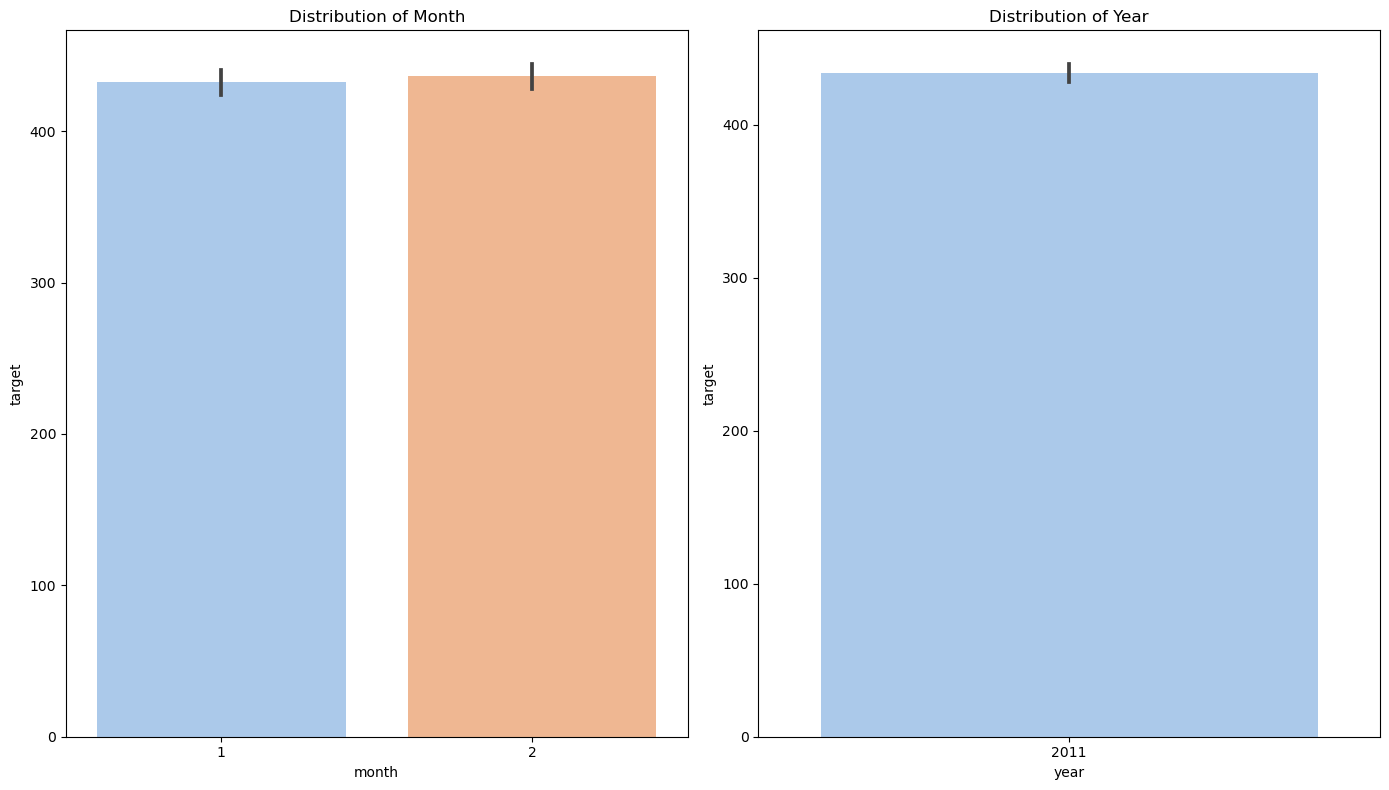

In [27]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.barplot(data=time_plot,x='month',y='target', palette='pastel')
plt.title('Distribution of Month')

plt.subplot(1,2,2)
sns.barplot(data=time_plot,x='year',y='target', palette='pastel')
plt.title('Distribution of Year')

plt.tight_layout()
plt.show()

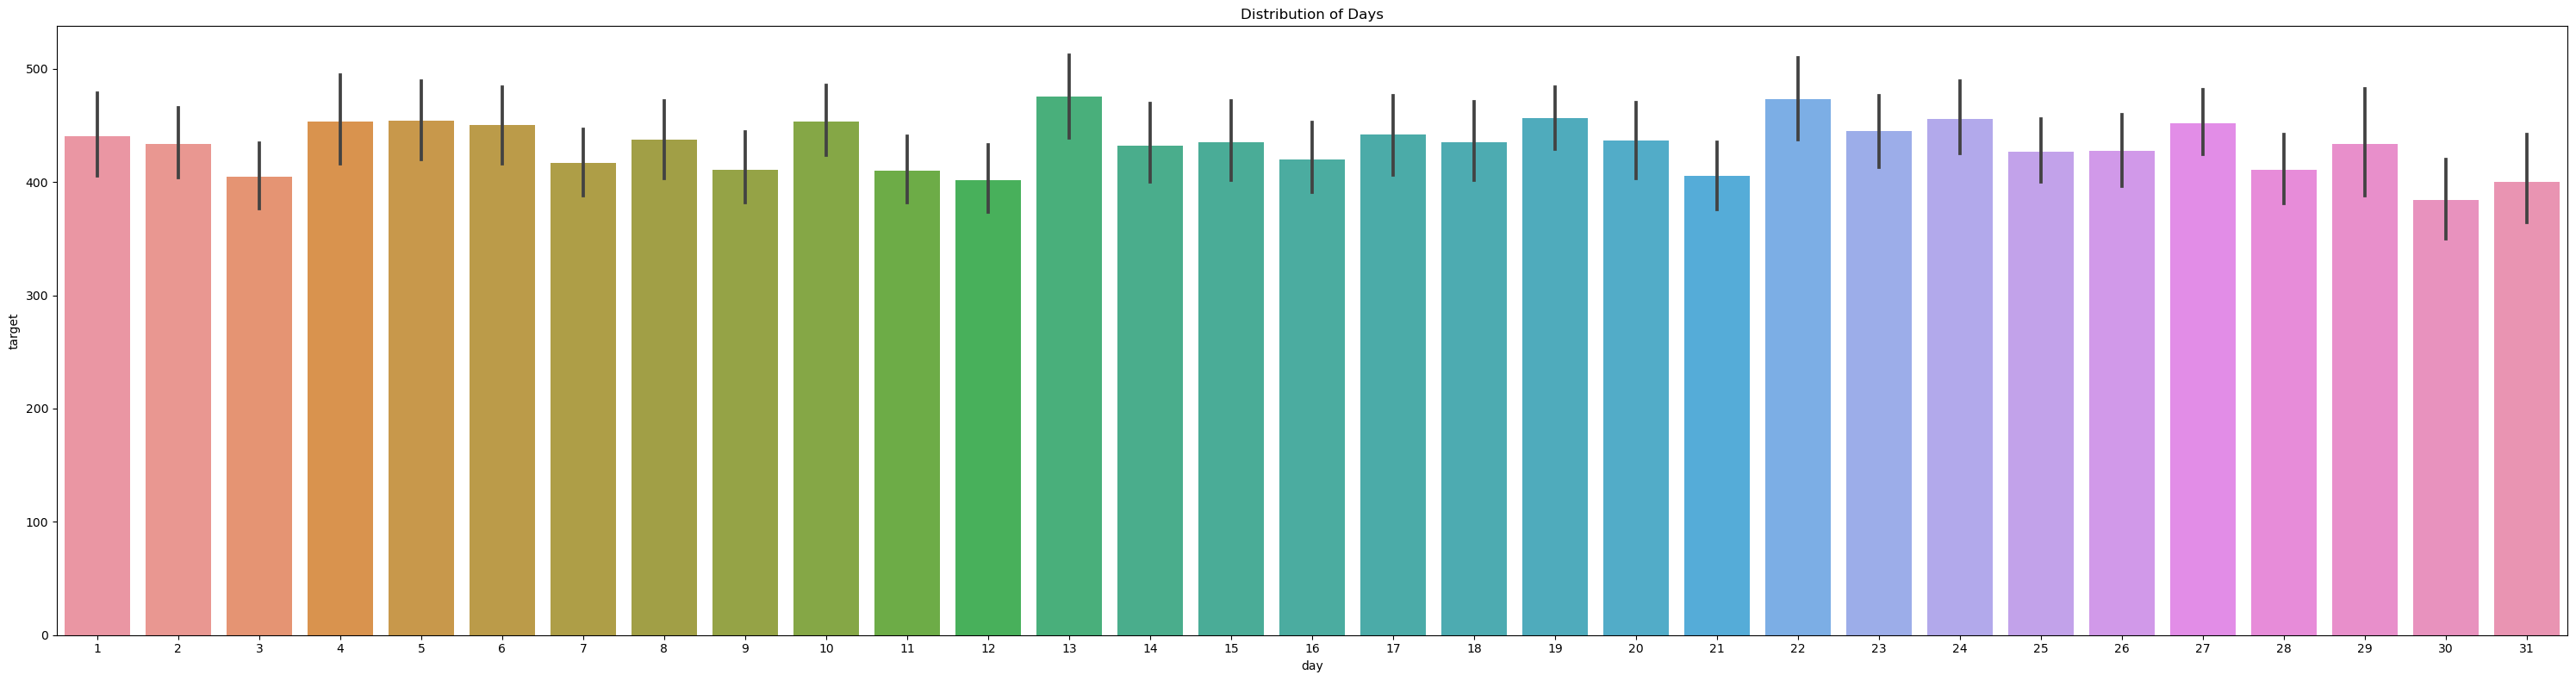

In [28]:
#plot day with target
plt.figure(figsize=(30,8))

sns.barplot(data=time_plot, x='day', y='target')
plt.title('Distribution of Days')
plt.tight_layout()
plt.show()

About these grafics we only can comment that the data about year, month and day its not relevant

In [29]:
numerical_df['month']=customer_df['month']
numerical_df['year']=customer_df['year']
numerical_df['day']=customer_df['day']
#Now concatenate the DataFrames
final_customer_df=pd.concat([numerical_df, categorical_df,target], axis=1)
final_customer_df

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  month  year  day  \
0                             0                   1      2  2011   24   
1                             0                   8      1  2011   31   
2                             0                   2      2  2011   19   
3                             0                   7      1  2011   20   
4                             0                   1      2  2011    3   
...                         ...                 ...    ...   ...  ...   
9129                          0                   2      2  2011   10   
9130                          0                   1      2  2011   12   
9131                          3                   2      2  2011    6   
9132                          0                   3      2  2011    3   
9133                          0                   1      2  2011   14   

      state_Arizona  state_California  state_Nevada  state_Oregon  \
0                 0                 0             0             0   
1                 1                 0             0             0   
2                 0                 0             1             0   
3                 0                 1             0             0   
4                 0                 0             0             0   
...             ...               ...           ...           ...   
9129              0                 1             0             0   
9130              0                 1             0             0   
9131              0                 1             0             0   
9132              0                 1             0             0   
9133              0                 1             0             0   

      state_Washington  response_No  response_Yes  coverage_Basic  \
0                    1            1             0               1   
1                    0            1             0               0   
2                    0            1             0               0   
3                    0            1             0               1   
4                    1            1             0               1   
...                ...          ...           ...             ...   
9129                 0            1             0               1   
9130                 0            0             1               0   
9131                 0            1             0               0   
9132                 0            1             0               0   
9133           

In [30]:
#Dealing with the outliers in "income" using iqr
iqr=np.percentile(final_customer_df['income'],75)-np.percentile(final_customer_df['income'],25)
upper_limit=np.percentile(final_customer_df['income'],75) +1.5*iqr
lower_limit=np.percentile(final_customer_df['income'],25) -1.5*iqr
final_customer_df=final_customer_df[(final_customer_df['income']>lower_limit) & (final_customer_df['income']<upper_limit)]

final_customer_df.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  month  year  day  \
0                          0                   1      2  2011   24   
1                          0                   8      1  2011   31   
2                          0                   2      2  2011   19   
3                          0                   7      1  2011   20   
4                          0                   1      2  2011    3   

   state_Arizona  state_California  state_Nevada  state_Oregon  \
0              0                 0             0             0   
1              1                 0             0             0   
2              0                 0             1             0   
3              0                 1             0             0   
4              0                 0             0             0   

   state_Washington  response_No  response_Yes  coverage_Basic  \
0                 1            1             0               1   
1                 0            1             0               0   
2                 0            1             0               0   
3                 0            1             0               1   
4                 1            1             0               1   

   coverage_Extended  coverage_Premium  education_Bachelor  education_College  \
0                  0                 0                   1                  0   
1                  1                 0                   1                  0   
2                  0                 1                   1                  0   
3                  0                 0                   1                  0   
4                  0                 0                   1                  0   

   education_Doctor  education_High School or Below  education_Master  \
0                 0                               0                 0   
1                 0                               0                 0   
2                 0                               0                 0   
3                 0                               0                 0   
4                 0                               0                 0   

   employmentstatus_Disabled  employmentstatus_Employed  \
0                          0                          1   
1                          0                          0   
2                          0                          1   
3                          0                          0   
4                          0                          1   

   employmentstatus_Medical Leave  employmentstatus_Retired  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   employmentstatus_Unemployed  gender_F  gender_M  renew_offer_type_Offer1  \
0                            0         1         0                        1   
1                            1         1         0                        0   
2                            0         1         0                        1   
3                            1         0         1                        1   
4    

In [31]:
final_customer_df.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  month  year  day  \
0                          0                   1      2  2011   24   
1                          0                   8      1  2011   31   
2                          0                   2      2  2011   19   
3                          0                   7      1  2011   20   
4                          0                   1      2  2011    3   

   state_Arizona  state_California  state_Nevada  state_Oregon  \
0              0                 0             0             0   
1              1                 0             0             0   
2              0                 0             1             0   
3              0                 1             0             0   
4              0                 0             0             0   

   state_Washington  response_No  response_Yes  coverage_Basic  \
0                 1            1             0               1   
1                 0            1             0               0   
2                 0            1             0               0   
3                 0            1             0               1   
4                 1            1             0               1   

   coverage_Extended  coverage_Premium  education_Bachelor  education_College  \
0                  0                 0                   1                  0   
1                  1                 0                   1                  0   
2                  0                 1                   1                  0   
3                  0                 0                   1                  0   
4                  0                 0                   1                  0   

   education_Doctor  education_High School or Below  education_Master  \
0                 0                               0                 0   
1                 0                               0                 0   
2                 0                               0                 0   
3                 0                               0                 0   
4                 0                               0                 0   

   employmentstatus_Disabled  employmentstatus_Employed  \
0                          0                          1   
1                          0                          0   
2                          0                          1   
3                          0                          0   
4                          0                          1   

   employmentstatus_Medical Leave  employmentstatus_Retired  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   employmentstatus_Unemployed  gender_F  gender_M  renew_offer_type_Offer1  \
0                            0         1         0                        1   
1                            1         1         0                        0   
2                            0         1         0                        1   
3                            1         0         1                        1   
4    

In [34]:
#Using standard scaler to scale the numerical variables
columns_to_scale=['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','total_claim_amount','month','day','year']
data_to_scale=final_customer_df[columns_to_scale]
scaler=StandardScaler()
scaled_data= scaler.fit_transform(data_to_scale)
scaled_final_customer_df=pd.DataFrame(scaled_data, columns=columns_to_scale)

In [36]:
#Merged scaled and unscaled columns
unscaled_columns=final_customer_df.drop(columns=columns_to_scale)
merged_final_customer_df=scaled_final_customer_df.join(unscaled_columns)
merged_final_customer_df.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                -0.762878  0.612827             -0.703925   
1                -0.149245 -1.239617              0.022691   
2                 0.710636  0.365710              0.429596   
3                -0.052263 -1.239617              0.371467   
4                -0.755575  0.203390             -0.587666   

   months_since_last_claim  months_since_policy_inception  \
0                 1.678099                      -1.543287   
1                -0.208186                      -0.217334   
2                 0.288205                      -0.360680   
3                 0.288205                       0.606907   
4                -0.307465                      -0.145661   

   number_of_open_complaints  number_of_policies  total_claim_amount  \
0                   -0.42225           -0.822648           -0.169640   
1                   -0.42225            2.106160            2.400737   
2                   -0.42225           -0.404247            0.455734   
3                   -0.42225            1.687759            0.329769   
4                   -0.42225           -0.822648           -1.018843   

      month       day  year  state_Arizona  state_California  state_Nevada  \
0  1.075304  0.986776   0.0              0                 0             0   
1 -0.929969  1.795716   0.0              1                 0             0   
2  1.075304  0.408962   0.0              0                 0             1   
3 -0.929969  0.524524   0.0              0                 1             0   
4  1.075304 -1.440045   0.0              0                 0             0   

   state_Oregon  state_Washington  response_No  response_Yes  coverage_Basic  \
0             0                 1            1             0               1   
1             0                 0            1             0               0   
2             0                 0            1             0               0   
3             0                 0            1             0               1   
4             0                 1            1             0               1   

   coverage_Extended  coverage_Premium  education_Bachelor  education_College  \
0                  0                 0                   1                  0   
1                  1                 0                   1                  0   
2                  0                 1                   1                  0   
3                  0                 0                   1                  0   
4                  0                 0                   1                  0   

   education_Doctor  education_High School or Below  education_Master  \
0                 0                               0                 0   
1                 0                               0                 0   
2                 0                               0                 0   
3                 0                               0                 0   
4                 0                               0                 0   

   employmentstatus_Disabled  employmentstatus_Employed  \
0                          0                          1   
1                          0                          0   
2                          0                          1   
3                          0                          0   
4                          0                          1   

   employmentstatus_Medical Leave  employmentstatus_Retired  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   employmentstatus_Unemployed  gender_F  gender_M  renew_offer_type_Offer1  \
0                            0         1         0                        1   
1                            1         1         0            